In [92]:
import pandas as pd
import openpyxl
import numpy as np
import os
import glob2
import glob
import random
import sklearn
import ntpath
import json
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from nltk.test.portuguese_en_fixt import setup_module
import nltk
from contextlib import nullcontext
import unicodedata
import plotly
import read_file_exec as rfe

## Puxada dos dados modelados do processo de extração

In [98]:
modelo_inventario = rfe.read_file('etl_results/tempo_em_estoque.xlsx').get_df()
modelo_transac_prod = rfe.read_file('etl_results/transacoes_produto_tratado_final.xlsx').get_df()

## Dados de Inventário

In [101]:
modelo_inventario


,codigo,descricao,categoria,estoque_disponivel,preco,incluido_em,alterado_em,ncm,taxa_depreciacao,ano_mes,...,clf_estoque,fator_atualizacao,depreciacao_unit,fator_correcao,correcao_unit,correcao_deprec,depreciacao,valor_ini,valor_estoque_deprec,valor_estoque_depreciado_corrigido
0,7100692,APLIQUE - APM4 -053 NOIVOS,papelaria,9.0,2.5,2020-11-16 17:19:42.000,2021-04-13 15:15:27.708,3926,0,2021-04,...,Produto no estoque,0.761290,0.000000,1.126423,2.816058,2.816058,0.000000,22.5,0.000000,0.000000
1,099939,MASSA BISCUIT acrilex 90G - AMARELO PELE,papelaria,0.0,4.5,2020-03-12 09:25:38.569,2021-04-13 14:54:44.957,3926,0,2021-04,...,Produto não está em estoque,1.000000,0.000000,1.126423,5.068904,5.068904,0.000000,0.0,0.000000,0.000000
2,099935,MASSA BISCUIT acrilex 90G - VERDE MUSGO,papelaria,0.0,4.5,2020-03-12 09:11:30.999,2021-04-13 14:55:19.701,3926,0,2021-04,...,Produto não está em estoque,1.000000,0.000000,1.126423,5.068904,5.068904,0.000000,0.0,0.000000,0.000000
3,099993,PINCEL TIGRE 815 - 04,papelaria,3.0,3.5,2020-03-12 16:23:51.521,2021-04-30 17:10:25.288,3926,0,2021-04,...,Produto no estoque,0.523590,0.000000,1.126423,3.942481,3.942481,0.000000,10.5,0.000000,0.000000
4,099996,PINCEL TIGRE 815 - 10,papelaria,4.0,5.0,2020-03-12 16:28:07.014,2021-04-30 17:11:11.816,3926,0,2021-04,...,Produto no estoque,0.523590,0.000000,1.126423,5.632116,5.632116,0.000000,20.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116,7100714,PANO DE COPA NATAL PAPAI NOEL,enxoval,0.0,9.5,2020-11-24 10:09:39.995,2022-01-15 10:33:43.065,6303,20,2022-01,...,Produto não está em estoque,1.000000,0.000000,1.042070,9.899664,5.894360,0.000000,0.0,0.000000,0.000000
5117,099804,TNT AZUL,tecido,4.0,2.0,2020-03-07 08:19:00.682,2020-04-29 14:49:39.436,6303,20,2020-04,...,Produto no estoque,0.938286,0.053687,1.202562,2.405123,2.351436,0.214748,8.0,0.214748,0.258248
5118,123594,LÃ BADEN - 20 VERMELHO,la,4.0,22.0,2020-04-02 13:03:35.661,2020-04-02 13:03:35.661,6303,20,2020-04,...,Risco de estoque parado,1.000000,0.524315,1.202562,26.456354,25.932039,2.097261,88.0,2.097261,2.522085
5119,099599,LÃ COLORPULL 8663,la,0.0,30.0,2020-03-05 09:03:44.801,2020-04-29 14:47:21.646,6303,20,2020-04,...,Produto não está em estoque,1.000000,0.805307,1.202562,36.076847,35.271540,0.000000,0.0,0.000000,0.000000


In [102]:
modelo_transac_prod 

,tipo,numero,data,hora,produto,quant_,vl__unitario,sub_total,desconto,outras_despesas,gerado_clf_auto,total,codigo,categoria
0,Ajuste de Custo,38041,2022-07-20 17:40:01.564,2022-07-20 17:40:01.564,LINHA CLÉA 125 -5899 PANTANAL,0.0,9.25,0.0,0.0,0,S,0.0,85922412,linha
1,Ajuste de Estoque +,38040,2022-07-20 17:40:01.374,2022-07-20 17:40:01.374,LINHA CLÉA 125 -5899 PANTANAL,10.0,0.00,0.0,0.0,0,S,0.0,15042603,linha
2,Ajuste de Custo,36992,2022-06-16 10:35:44.146,2022-06-16 10:35:44.146,"AGULHA CROCHE LULI - 5,5",0.0,3.00,0.0,0.0,0,S,0.0,3456886,armarinho
3,Ajuste de Estoque +,36991,2022-06-16 10:35:43.968,2022-06-16 10:35:43.968,"AGULHA CROCHE LULI - 5,5",12.0,0.00,0.0,0.0,0,S,0.0,99629223,armarinho
4,Venda,36767,2022-06-09 10:42:36.640,2022-06-09 10:42:36.640,PAPEL DECOUPAGE-AFQ-032,-1.0,3.00,3.0,0.0,0,S,3.0,37013810,papelaria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47447,Ajuste de Estoque +,7,2020-02-03 13:31:23.044,2020-02-03 13:31:23.044,Linha Rayza - Cinza,9.0,0.00,0.0,0.0,0,N,0.0,98012,linha
47448,Ajuste de Custo,6,2020-02-03 13:29:52.455,2020-02-03 13:29:52.455,Linha Rayza - Laranja,0.0,5.50,0.0,0.0,0,N,0.0,98033,linha
47449,Ajuste de Estoque +,5,2020-02-03 13:29:52.440,2020-02-03 13:29:52.440,Linha Rayza - Laranja,5.0,0.00,0.0,0.0,0,N,0.0,98033,linha
47450,Ajuste de Custo,4,2020-02-03 13:27:48.967,2020-02-03 13:27:48.967,Linha Rayza - Verde Bandeira,0.0,5.50,0.0,0.0,0,N,0.0,98043,linha


<Figure size 640x480 with 0 Axes>

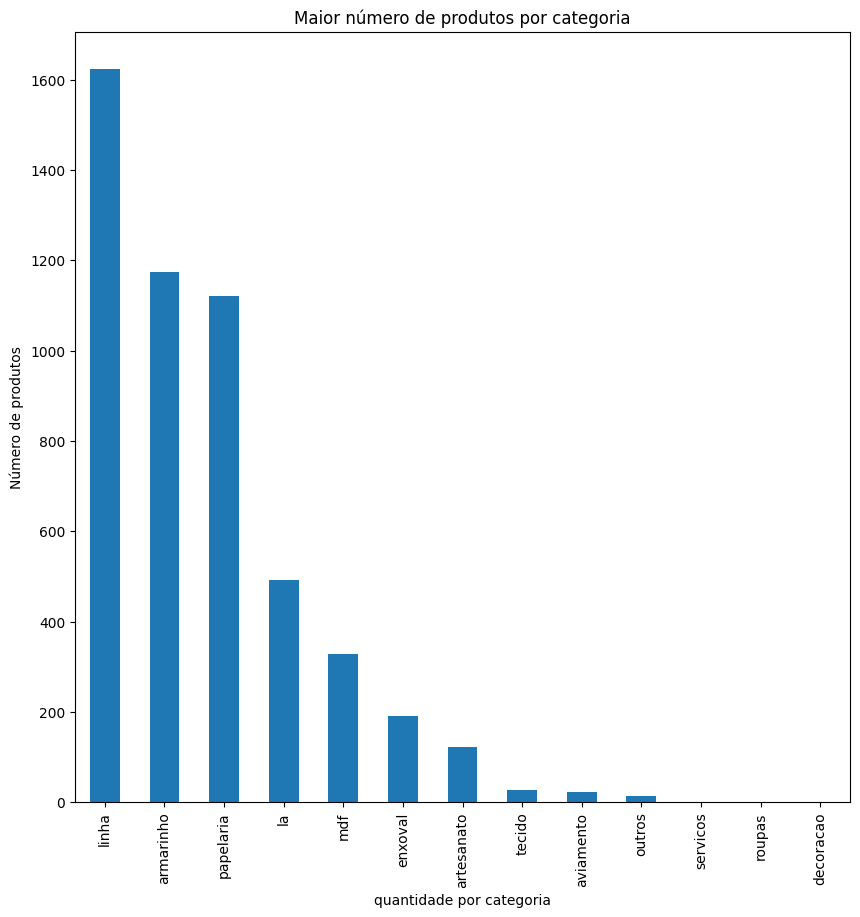

In [103]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots()

# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)


plot_rank_categoria = modelo_inventario['categoria'].value_counts().plot(kind='bar', title='Maior número de produtos por categoria',figsize=(10,10))
plot_rank_categoria.set_xlabel('quantidade por categoria')
plot_rank_categoria.set_ylabel('Número de produtos')
plt.show()

In [6]:
classificacao_inv = modelo_inventario.groupby('clf_estoque').agg({'categoria': 'nunique', 'codigo': 'count'})
classificacao_inv.head()

,categoria,codigo
clf_estoque,,
Produto alterado no último trimestre,10,186
Produto no estoque,9,3130
Produto não está em estoque,12,927
Risco de estoque parado,10,878


<Figure size 640x480 with 0 Axes>

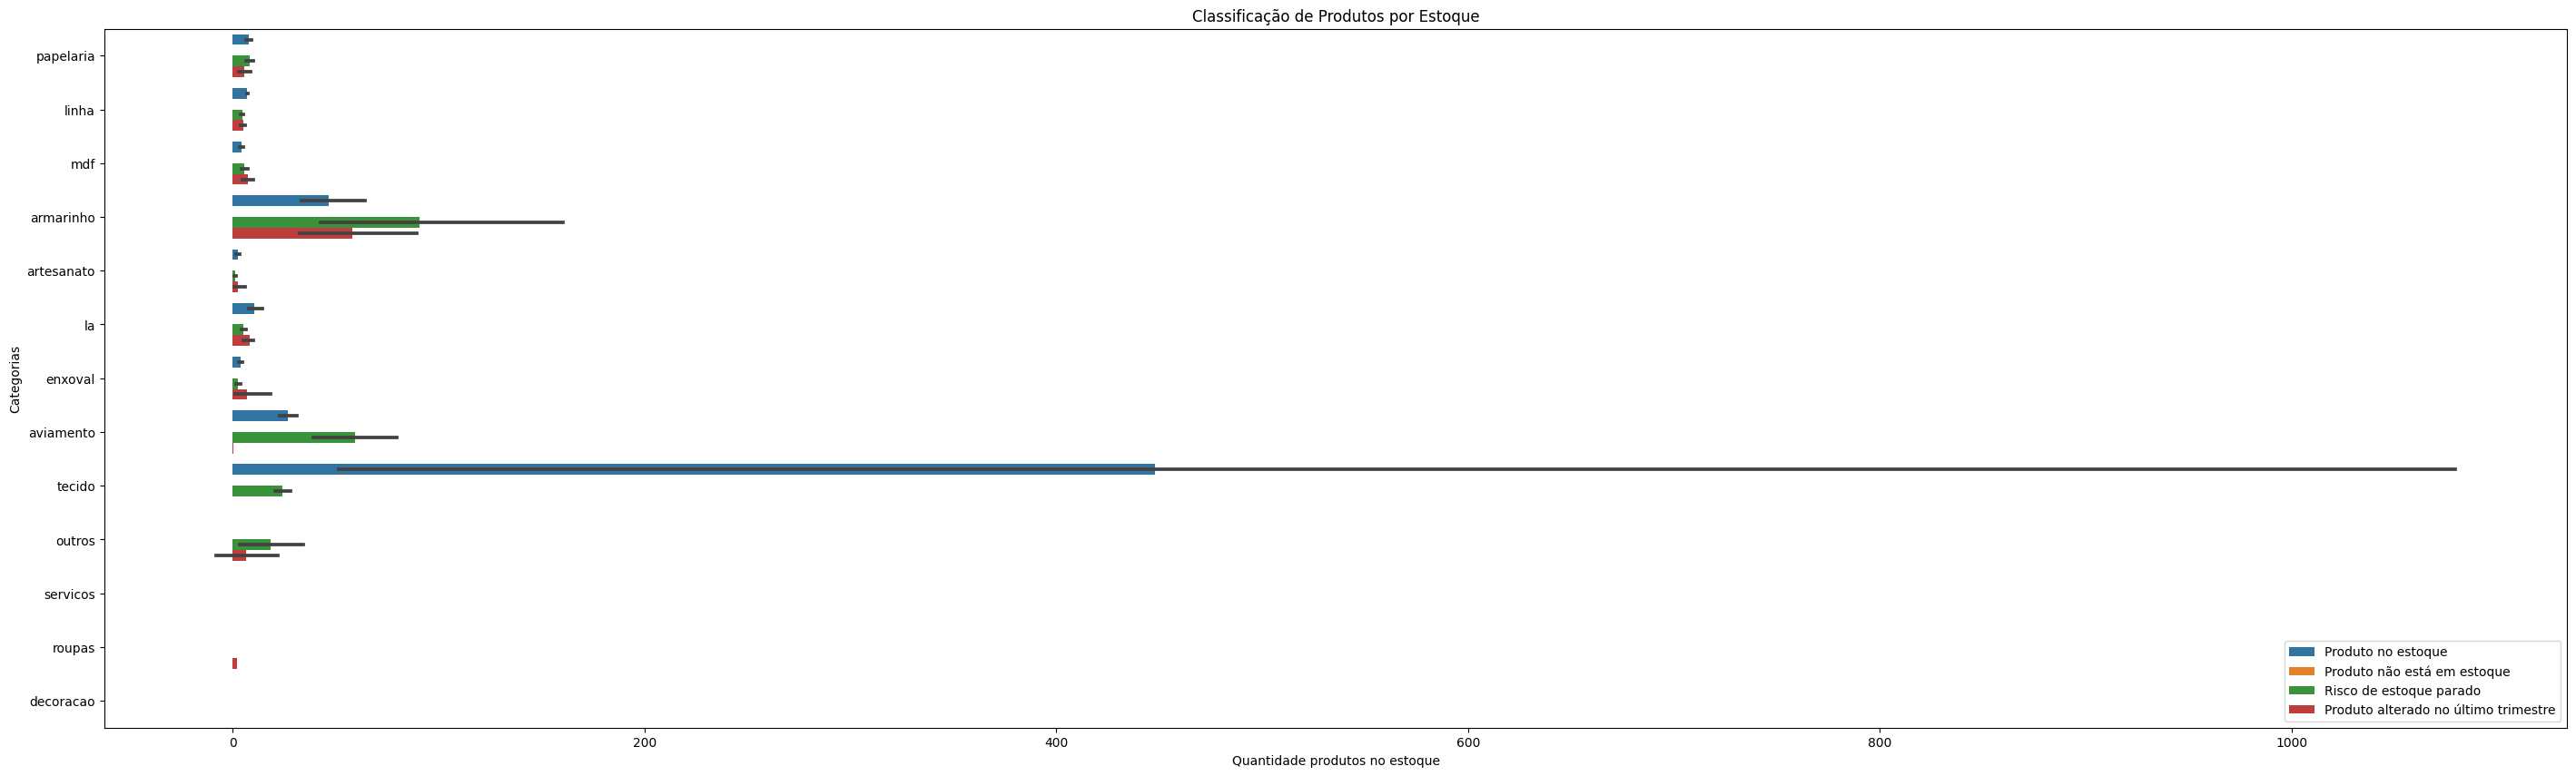

<Figure size 2000x2000 with 0 Axes>

In [7]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (35,10)
fig, ax = plt.subplots()

# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

#plot by clf_estoque from tempo_em_estoque

plot_classificacao_inv = sns.barplot(x='estoque_disponivel', y='categoria', data=modelo_inventario, hue='clf_estoque')
plot_classificacao_inv.set_xlabel('Quantidade produtos no estoque')
plot_classificacao_inv.set_ylabel('Categorias')
plot_classificacao_inv.set_title('Classificação de Produtos por Estoque')
plot_classificacao_inv.legend(loc='lower right')
plt.figure(figsize=(20,20))
plt.show()

In [8]:
tempo_em_estoque_parado = modelo_inventario[modelo_inventario['clf_estoque'] == 'Risco de estoque parado']
agrupamento_clf = tempo_em_estoque_parado.groupby(['categoria']).agg({'codigo': 'count','preco': 'mean','estoque_disponivel': 'mean'})
agrupamento_clf

,codigo,preco,estoque_disponivel
categoria,,,
armarinho,170,8.248882,90.878353
artesanato,16,92.062500,1.250000
aviamento,18,5.138889,59.472222
enxoval,23,56.260870,2.652174
la,18,32.600000,5.388889
linha,47,38.385106,4.595745
mdf,126,16.509127,5.801587
outros,4,17.325000,18.625000
papelaria,452,5.823230,8.265487


Será considerado uma análise dos itens classificados como "Risco de estoque parado".

In [9]:
agrupamento_risco = modelo_inventario[modelo_inventario['clf_estoque'] == 'Risco de estoque parado'].groupby(['clf_estoque','categoria']).agg({'codigo': 'count','preco': 'mean','estoque_disponivel': 'mean','te_inicio_presente': 'mean','te_atualizacao_presente': 'mean','te_inicio_atualizacao': 'mean','fator_atualizacao': 'mean','depreciacao': 'mean'})
for index, row in agrupamento_risco.iterrows():
    agrupamento_risco = agrupamento_risco.drop(index)
    

<Figure size 40x30 with 0 Axes>

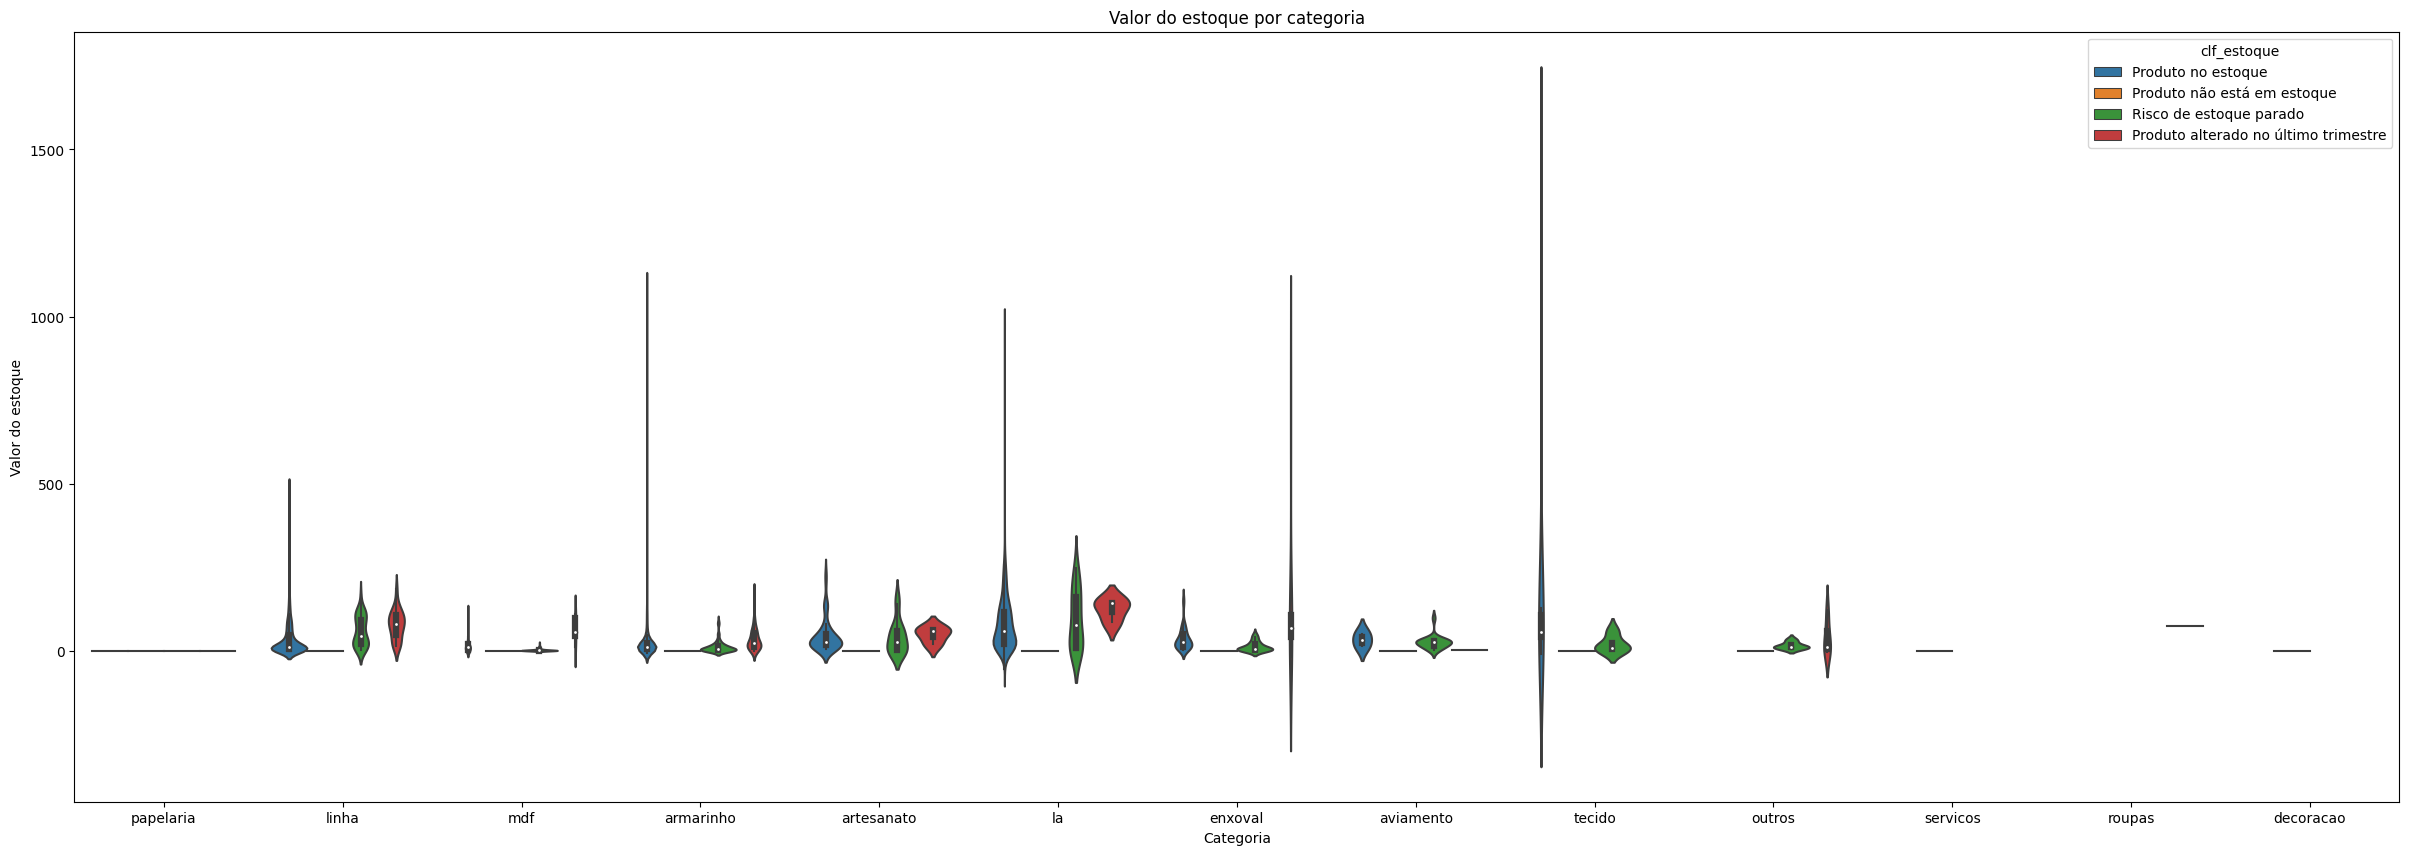

<Figure size 2000x2000 with 0 Axes>

In [10]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=5)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,10)
fig, ax = plt.subplots()

# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

b=sns.violinplot(x = 'categoria',y='valor_estoque_depreciado_corrigido', data=modelo_inventario, hue='clf_estoque')
b.set_xlabel('Categoria')
b.set_ylabel('Valor do estoque')
b.set_title('Valor do estoque por categoria')
plt.figure(figsize=(20,20))
plot_classificacao_inv.legend(loc='upper left')
plt.show()


In [11]:
#Rank de produtos em estoque por categoria com risco de estarem parados
top_10_fator_atualizacao_2 = modelo_inventario[modelo_inventario['fator_atualizacao'] == 1]
top_10_fator_atualizacao_2 = top_10_fator_atualizacao_2.sort_values(by=['fator_atualizacao'], ascending=False).groupby('clf_estoque')

top_10_fator_atualizacao_2[['categoria','descricao','estoque_disponivel','te_inicio_atualizacao','fator_atualizacao']].head(50)


,categoria,descricao,estoque_disponivel,te_inicio_atualizacao,fator_atualizacao
1,papelaria,MASSA BISCUIT acrilex 90G - AMARELO PELE,0.0,397,1.0
2958,linha,BARBANTE TRENTO - CINZA 270,0.0,795,1.0
2754,armarinho,"AGULHA CROCHÊ CIRCULO - 3,5",0.0,710,1.0
2753,armarinho,AGULHA CROCHÊ CIRCULO - 3,0.0,710,1.0
2745,armarinho,"AGULHA CROCHÊ MILWARD 5,5mm",0.0,0,1.0
...,...,...,...,...,...
1746,armarinho,RENDA GUIPEARE CHL 589 VERMELHO,13.7,0,1.0
1745,armarinho,RENDA GUIPEARE CHL 589 ROSA 5CM,17.0,0,1.0
1744,armarinho,RENDA GUIPEARE CHL 589 PRETA,27.4,0,1.0
1743,armarinho,RENDA GUIPEARE CHL - 438 PRETA,13.7,0,1.0


In [12]:
#g = sns.PairGrid(modelo_inventario, hue="categoria")
#g.map_diag(sns.histplot)
#g.map_offdiag(sns.scatterplot)
#g.add_legend()

In [13]:
#g = sns.PairGrid(modelo_inventario, hue="clf_estoque")
#g.map_diag(sns.histplot)
#g.map_offdiag(sns.scatterplot)
#g.add_legend()

In [14]:
#g = sns.PairGrid(modelo_inventario[modelo_inventario['clf_estoque'] == 'Risco de estoque parado'], hue='categoria')
#g.map_diag(sns.histplot)
#g.map_offdiag(sns.scatterplot)
#g.add_legend()

In [15]:
corr = modelo_inventario.corr()
corr.style.background_gradient(cmap='coolwarm')



,estoque_disponivel,preco,taxa_depreciacao,indice,te_inicio_presente,te_atualizacao_presente,te_inicio_atualizacao,anos_estoque,fator_atualizacao,depreciacao_unit,fator_correcao,correcao_unit,correcao_deprec,depreciacao,valor_ini,valor_estoque_deprec,valor_estoque_depreciado_corrigido
estoque_disponivel,1.000000,-0.048912,-0.021540,-0.005467,-0.049469,-0.002356,-0.040144,-0.002356,-0.007855,-0.021905,0.003261,-0.048682,-0.041923,0.112832,0.435573,0.169755,0.177522
preco,-0.048912,1.000000,0.216145,0.092176,-0.120110,-0.091029,-0.033117,-0.091029,0.049189,0.240378,-0.093877,0.998697,0.925785,0.028830,0.246303,0.180554,0.185590
taxa_depreciacao,-0.021540,0.216145,1.000000,0.226658,0.162022,-0.228193,0.309603,-0.228193,-0.188094,0.174365,-0.231518,0.210924,0.101674,0.153060,0.112504,0.244184,0.245432
indice,-0.005467,0.092176,0.226658,1.000000,-0.220137,-0.993137,0.563131,-0.993137,-0.634624,-0.212415,-0.998817,0.065239,-0.090831,-0.193983,0.167293,0.352635,0.349056
te_inicio_presente,-0.049469,-0.120110,0.162022,-0.220137,1.000000,0.225829,0.677535,0.225829,-0.108059,0.105283,0.215574,-0.109936,-0.043739,0.106955,-0.114973,-0.136382,-0.135817
te_atualizacao_presente,-0.002356,-0.091029,-0.228193,-0.993137,0.225829,1.000000,-0.563482,1.000000,0.633700,0.196041,0.995289,-0.064188,0.088819,0.178207,-0.168748,-0.345096,-0.341982
te_inicio_atualizacao,-0.040144,-0.033117,0.309603,0.563131,0.677535,-0.563482,1.000000,-0.563482,-0.570013,-0.058740,-0.568620,-0.044755,-0.104150,-0.043948,0.029907,0.144914,0.143041
anos_estoque,-0.002356,-0.091029,-0.228193,-0.993137,0.225829,1.000000,-0.563482,1.000000,0.633700,0.196041,0.995289,-0.064188,0.088819,0.178207,-0.168748,-0.345096,-0.341982
fator_atualizacao,-0.007855,0.049189,-0.188094,-0.634624,-0.108059,0.633700,-0.570013,0.633700,1.000000,0.157623,0.631223,0.063531,0.139196,0.045135,-0.213566,-0.356525,-0.353699
depreciacao_unit,-0.021905,0.240378,0.174365,-0.212415,0.105283,0.196041,-0.058740,0.196041,0.157623,1.000000,0.206940,0.266818,0.362237,0.350852,-0.009473,-0.069726,-0.067712


Devido à baixa correlação presente na massa de dados, O trabalho passa a considerar os dados de Transação de produtos para a análise do modelo.



## DataFrame de Produtos

In [54]:
tipo_transf = modelo_transac_prod.tipo.unique()
tipo_transf

array(['Ajuste de Custo', 'Ajuste de Estoque +', 'Venda',
       'Ajuste de Estoque -', 'Devolução do Cliente'], dtype=object)

In [55]:
modelo_transac_prod['tipo'].value_counts()

Venda                   19997
Ajuste de Custo         13501
Ajuste de Estoque +      8984
Ajuste de Estoque -      4967
Devolução do Cliente        3
Name: tipo, dtype: int64

### Dados de Venda

In [56]:
modelo_transac_prod_vendas = modelo_transac_prod[modelo_transac_prod['tipo'] == 'Venda']
modelo_transac_prod_vendas['quant_'] = modelo_transac_prod_vendas['quant_']*-1
modelo_transac_prod_vendas


C:\Users\otavi\AppData\Local\Temp\ipykernel_32076\4115075773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modelo_transac_prod_vendas['quant_'] = modelo_transac_prod_vendas['quant_']*-1


,tipo,numero,data,hora,produto,quant_,vl__unitario,sub_total,desconto,outras_despesas,gerado_clf_auto,total,codigo,categoria
4,Venda,36767,2022-06-09 10:42:36.640,2022-06-09 10:42:36.640,PAPEL DECOUPAGE-AFQ-032,1.0,3.0,3.0,0.00,0,S,3.00,37013810,papelaria
5,Venda,36547,2022-06-03 09:31:31.703,2022-06-03 09:31:31.703,BASTIDOR MDF - 18CM,1.0,8.5,8.5,0.00,0,S,8.50,32968828,mdf
6,Venda,36426,2022-05-30 16:24:04.069,2022-05-30 16:24:04.069,FRALDA BOCA NICOLI - ROSA,2.0,4.8,9.6,0.00,0,S,9.60,30058838,enxoval
7,Venda,36392,2022-05-28 10:42:32.680,2022-05-28 10:42:32.680,"AGULHA CROCHÊ ESMALTADA - 2,5M",1.0,7.0,7.0,0.22,0,S,6.78,18828463,armarinho
8,Venda,36367,2022-05-27 14:08:31.247,2022-05-27 14:08:31.247,"AGULHA CROCHÊ MILWARD 5,5 mm",1.0,7.0,7.0,0.69,0,S,6.31,98947493,armarinho
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36476,Venda,11638,2020-09-13 16:46:32.133,2020-09-13 16:46:32.133,Linha Rayza - Lilás,2.0,8.5,17.0,0.00,0,N,17.00,98006,linha
36477,Venda,11637,2020-09-13 16:45:49.784,2020-09-13 16:45:49.784,COSTURA DRIMA - 6104,1.0,2.0,2.0,0.00,0,N,2.00,7099730,linha
36478,Venda,11637,2020-09-13 16:45:49.784,2020-09-13 16:45:49.784,COSTURA DRIMA - 5878,1.0,2.0,2.0,0.00,0,N,2.00,N126100-005876,linha
36479,Venda,11637,2020-09-13 16:45:49.784,2020-09-13 16:45:49.784,COSTURA DRIMA - PT,1.0,2.0,2.0,0.00,0,N,2.00,098930,linha


In [19]:
modelo_transac_prod_vendas = modelo_transac_prod_vendas.groupby(['numero','categoria','data']).agg({'quant_': 'sum','total':'sum'}).reset_index()
modelo_transac_prod_vendas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12172 entries, 0 to 12171
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   numero     12172 non-null  int64         
 1   categoria  12172 non-null  object        
 2   data       12172 non-null  datetime64[ns]
 3   quant_     12172 non-null  float64       
 4   total      12172 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 475.6+ KB


In [20]:
#modelo_transac_prod_vendas normalize quant_ field
modelo_transac_prod_vendas['qtd_norm'] = (modelo_transac_prod_vendas['quant_'] - modelo_transac_prod_vendas['quant_'].min())/ (modelo_transac_prod_vendas['quant_'].max() - modelo_transac_prod_vendas['quant_'].min())
modelo_transac_prod_vendas['data_dia'] = modelo_transac_prod_vendas['data'].dt.date 

In [21]:
#ajustando o campo data para o formato datetime para poder fazer o agrupamento
modelo_transac_prod_vendas_diario = modelo_transac_prod_vendas[['numero','categoria','data_dia','quant_','qtd_norm','total']]

In [22]:
modelo_transac_prod_vendas_diario 



,numero,categoria,data_dia,quant_,qtd_norm,total
0,11637,linha,2020-09-13,4.00,0.003988,8.00
1,11638,linha,2020-09-13,2.00,0.001988,17.00
2,11639,linha,2020-09-13,1.00,0.000988,8.50
3,11640,linha,2020-09-13,4.00,0.003988,34.00
4,11641,linha,2020-09-13,1.00,0.000988,12.90
...,...,...,...,...,...,...
12167,38248,papelaria,2022-07-29,1.00,0.000988,16.80
12168,38251,armarinho,2022-07-30,1.00,0.000988,5.80
12169,38251,linha,2022-07-30,2.00,0.001988,6.00
12170,38252,armarinho,2022-07-30,100.00,0.099989,28.00


<Figure size 640x480 with 0 Axes>

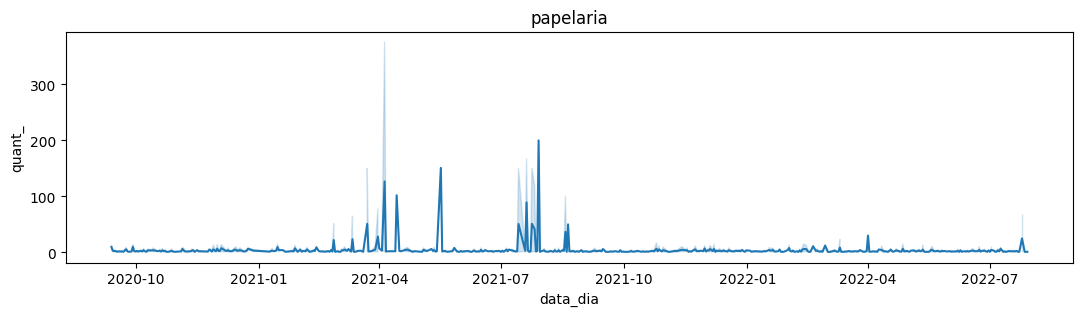

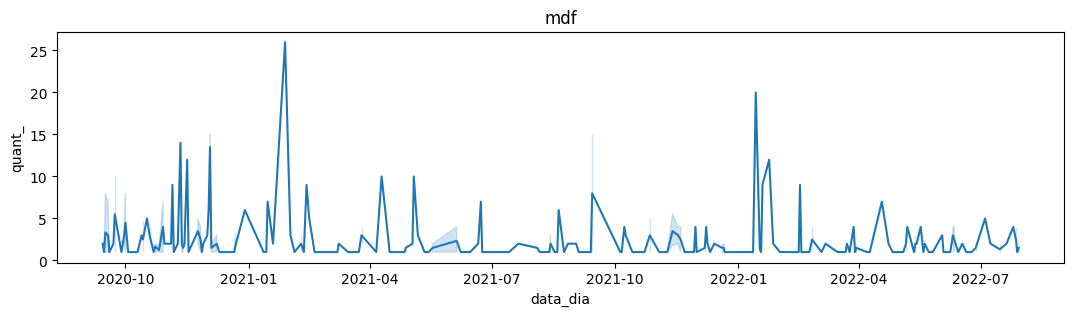

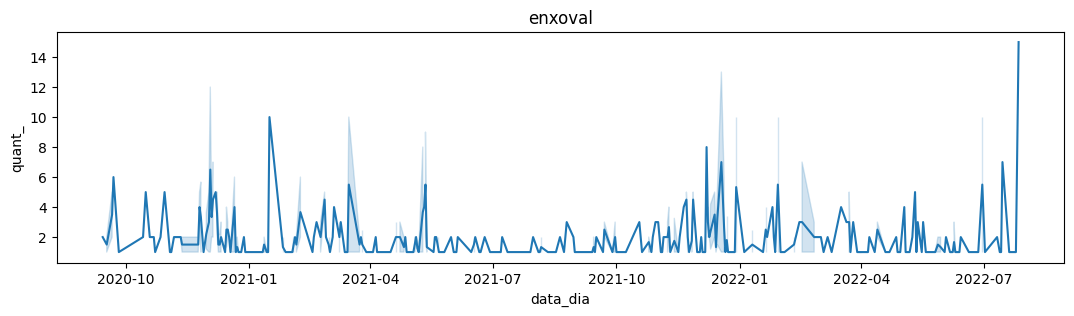

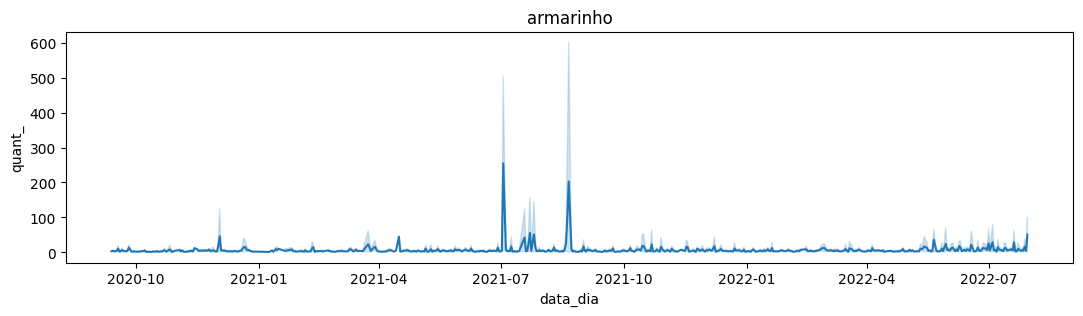

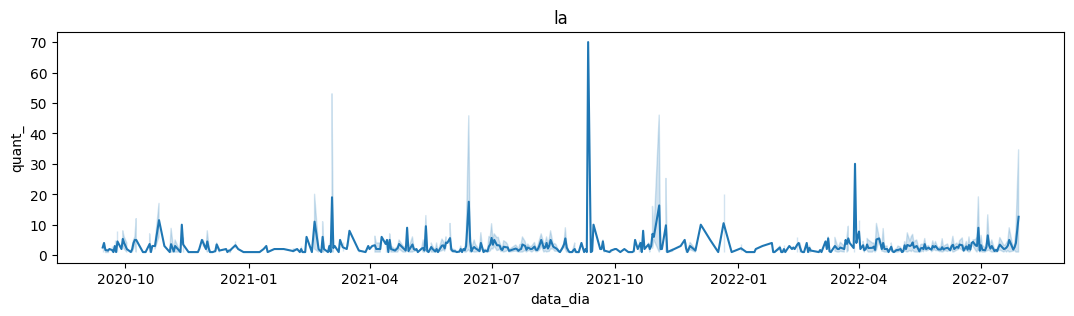

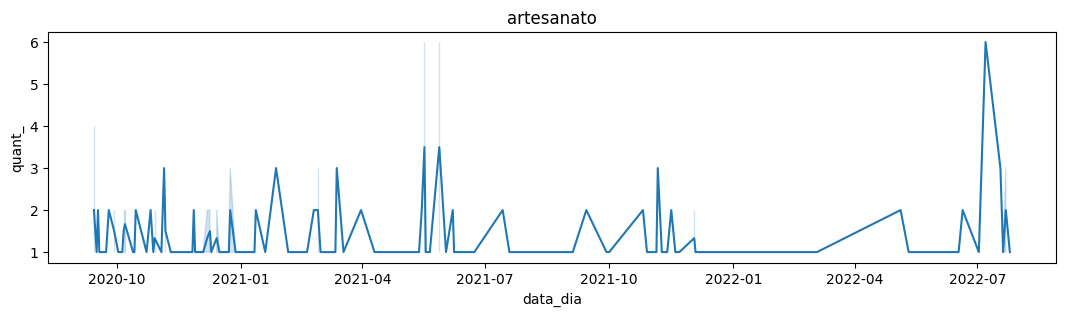

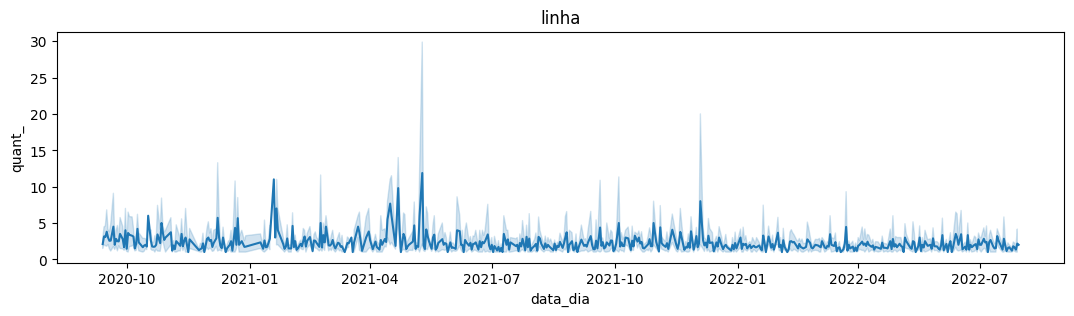

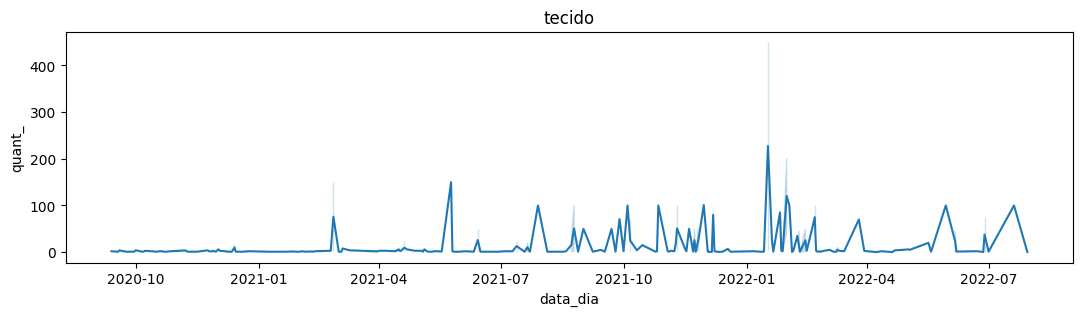

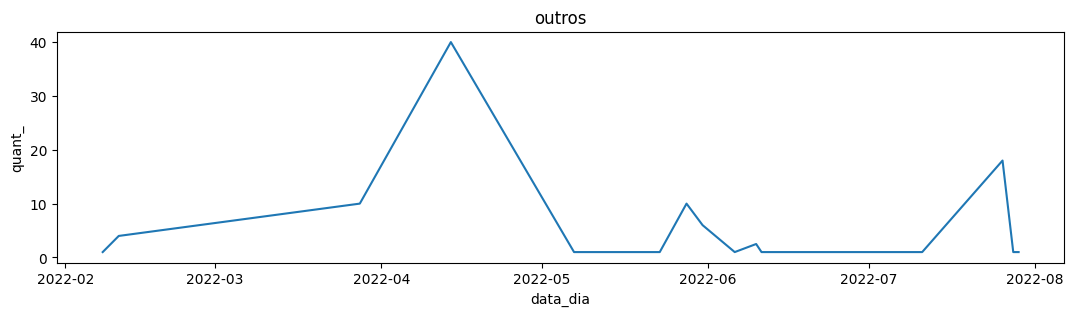

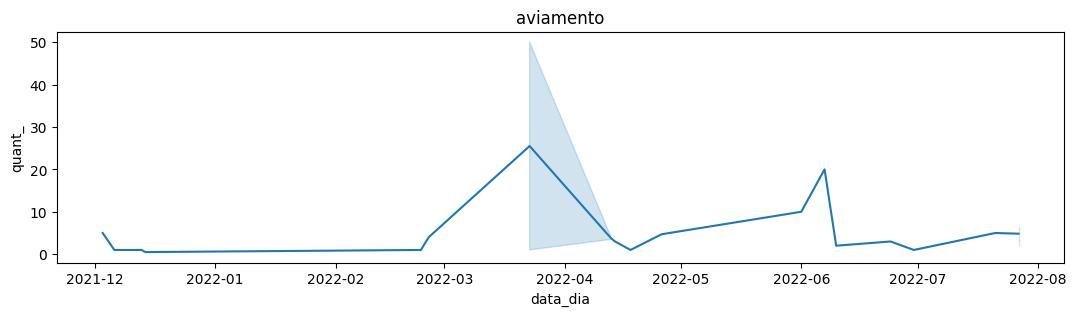

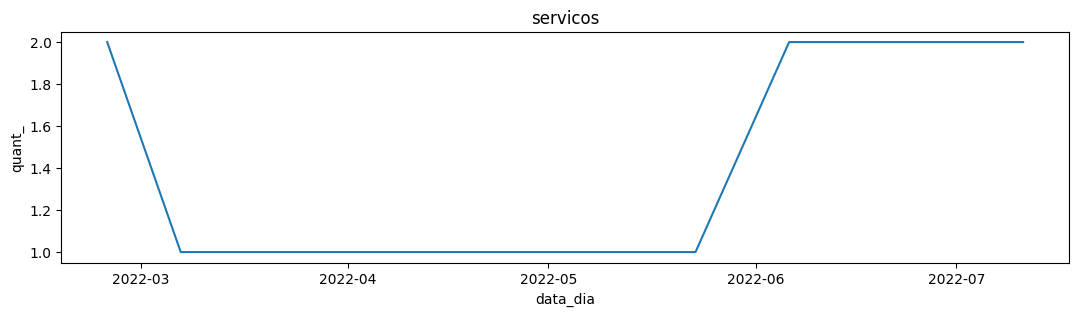

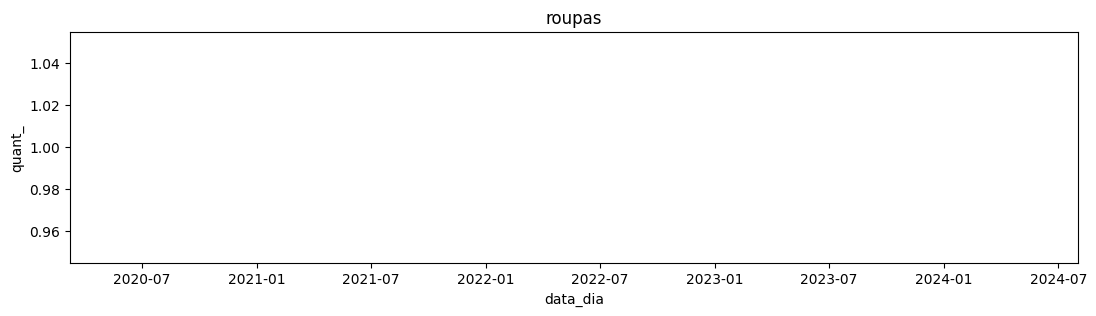

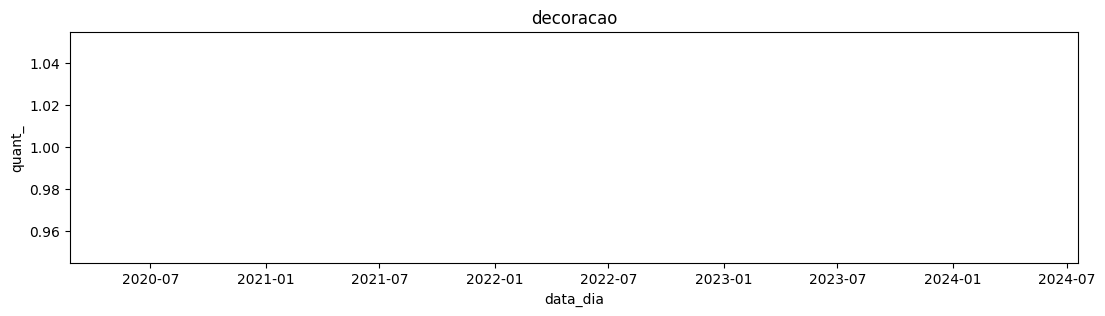

In [60]:
#sns timeplot hue categoria dataframe_transacoes_produto_tratado_2 by venda and data
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (13,3)
fig, ax = plt.subplots()
#create a time plot 
for categoria in modelo_transac_prod_vendas['categoria'].unique():
    modelo_transac_prod_vendas_categoria =modelo_transac_prod_vendas_diario[modelo_transac_prod_vendas_diario['categoria'] == categoria]
    sns.lineplot(x='data_dia', y=(modelo_transac_prod_vendas_categoria['quant_']), data=modelo_transac_prod_vendas_diario)
    plt.title(categoria)
    plt.show()




## Dados Estoque

In [75]:
modelo_transac_prod_estoque = modelo_transac_prod.query("tipo == 'Ajuste de Estoque +' | tipo == 'Vendas'")
modelo_transac_prod_estoque


,tipo,numero,data,hora,produto,quant_,vl__unitario,sub_total,desconto,outras_despesas,gerado_clf_auto,total,codigo,categoria
1,Ajuste de Estoque +,38040,2022-07-20 17:40:01.374,2022-07-20 17:40:01.374,LINHA CLÉA 125 -5899 PANTANAL,10.0,0.0,0.0,0.0,0,S,0.0,15042603,linha
3,Ajuste de Estoque +,36991,2022-06-16 10:35:43.968,2022-06-16 10:35:43.968,"AGULHA CROCHE LULI - 5,5",12.0,0.0,0.0,0.0,0,S,0.0,99629223,armarinho
13,Ajuste de Estoque +,36196,2022-05-21 12:00:33.428,2022-05-21 12:00:33.428,CACHECOL GOLA LÃ ONDA CIDINHA BORGES,1.0,0.0,0.0,0.0,0,S,0.0,11768732,la
20,Ajuste de Estoque +,35979,2022-05-17 10:46:32.297,2022-05-17 10:46:32.297,TOUCA TRICO ROSA,1.0,0.0,0.0,0.0,0,S,0.0,31327216,armarinho
22,Ajuste de Estoque +,35951,2022-05-16 13:07:22.889,2022-05-16 13:07:22.889,TOALHA LAVABO PINTADA C/ RENDA,2.0,0.0,0.0,0.0,0,S,0.0,80901586,enxoval
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47443,Ajuste de Estoque +,11,2020-02-03 13:33:47.635,2020-02-03 13:33:47.635,Linha Rayza - Branco Optico,31.0,0.0,0.0,0.0,0,N,0.0,98001,linha
47445,Ajuste de Estoque +,9,2020-02-03 13:32:03.280,2020-02-03 13:32:03.280,Linha Rayza - Cenoura,10.0,0.0,0.0,0.0,0,N,0.0,98021,linha
47447,Ajuste de Estoque +,7,2020-02-03 13:31:23.044,2020-02-03 13:31:23.044,Linha Rayza - Cinza,9.0,0.0,0.0,0.0,0,N,0.0,98012,linha
47449,Ajuste de Estoque +,5,2020-02-03 13:29:52.440,2020-02-03 13:29:52.440,Linha Rayza - Laranja,5.0,0.0,0.0,0.0,0,N,0.0,98033,linha


In [76]:
modelo_transac_prod_estoque = modelo_transac_prod_estoque.groupby(['numero','tipo','categoria','data']).agg({'quant_': 'sum','total':'sum'}).reset_index()
modelo_transac_prod_estoque.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8924 entries, 0 to 8923
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   numero     8924 non-null   int64         
 1   tipo       8924 non-null   object        
 2   categoria  8924 non-null   object        
 3   data       8924 non-null   datetime64[ns]
 4   quant_     8924 non-null   float64       
 5   total      8924 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 418.4+ KB


In [77]:
#modelo_transac_prod_vendas normalize quant_ field
modelo_transac_prod_estoque['qtd_norm'] = (modelo_transac_prod_estoque['quant_'] - modelo_transac_prod_estoque['quant_'].min())/ (modelo_transac_prod_estoque['quant_'].max() - modelo_transac_prod_estoque['quant_'].min())
modelo_transac_prod_estoque['data_dia'] = modelo_transac_prod_estoque['data'].dt.date 

In [78]:
#ajustando o campo data para o formato datetime para poder fazer o agrupamento
modelo_transac_prod_estoque_diario = modelo_transac_prod_estoque[['numero','tipo','categoria','data_dia','quant_','qtd_norm','total']].reset_index()



In [79]:
modelo_transac_prod_estoque_diario 

,index,numero,tipo,categoria,data_dia,quant_,qtd_norm,total
0,0,1,Ajuste de Estoque +,linha,2020-02-03,1.0,0.000064,0.0
1,1,3,Ajuste de Estoque +,linha,2020-02-03,9.0,0.000732,0.0
2,2,5,Ajuste de Estoque +,linha,2020-02-03,5.0,0.000398,0.0
3,3,7,Ajuste de Estoque +,linha,2020-02-03,9.0,0.000732,0.0
4,4,9,Ajuste de Estoque +,linha,2020-02-03,10.0,0.000815,0.0
...,...,...,...,...,...,...,...,...
8919,8919,38219,Ajuste de Estoque +,armarinho,2022-07-28,1.0,0.000064,0.0
8920,8920,38220,Ajuste de Estoque +,armarinho,2022-07-28,1.0,0.000064,0.0
8921,8921,38226,Ajuste de Estoque +,mdf,2022-07-29,1.0,0.000064,0.0
8922,8922,38232,Ajuste de Estoque +,outros,2022-07-29,1.0,0.000064,0.0


<Figure size 640x480 with 0 Axes>

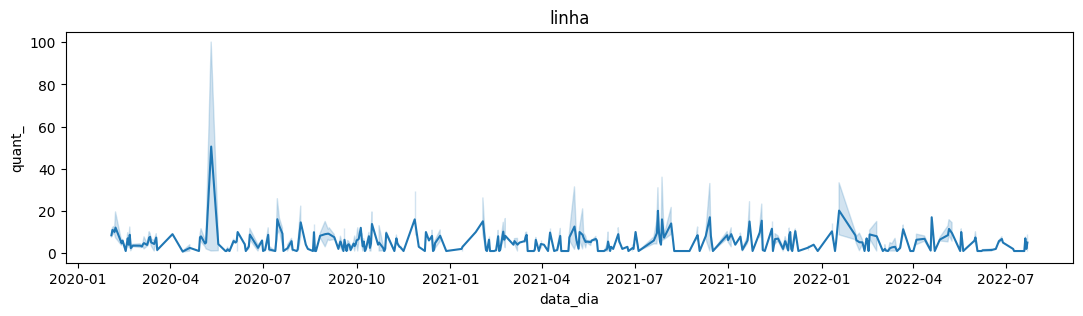

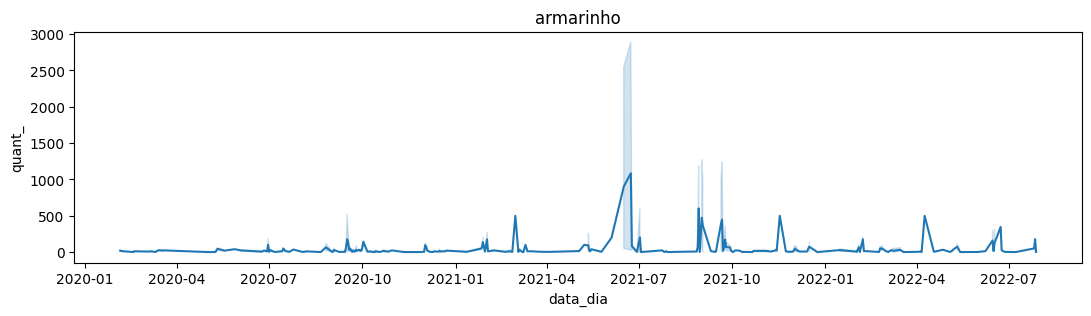

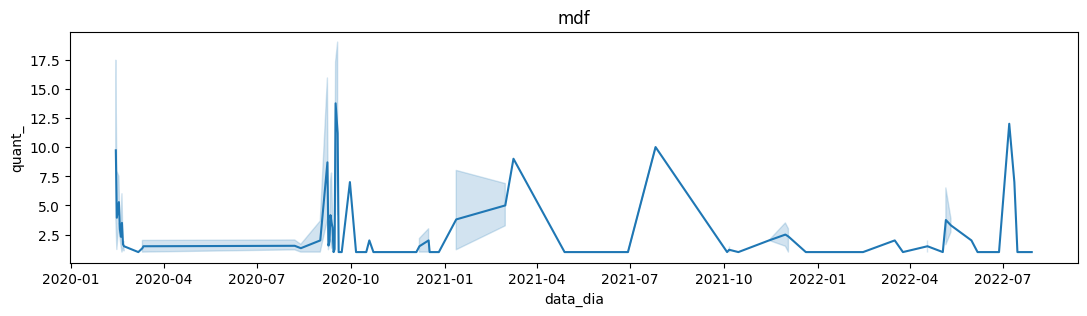

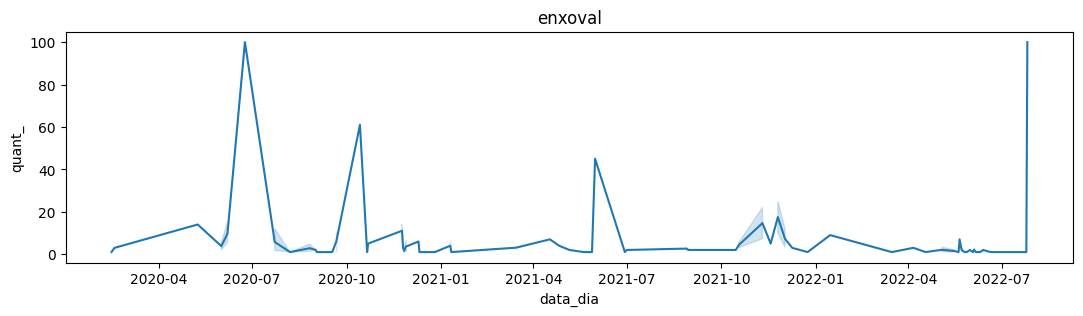

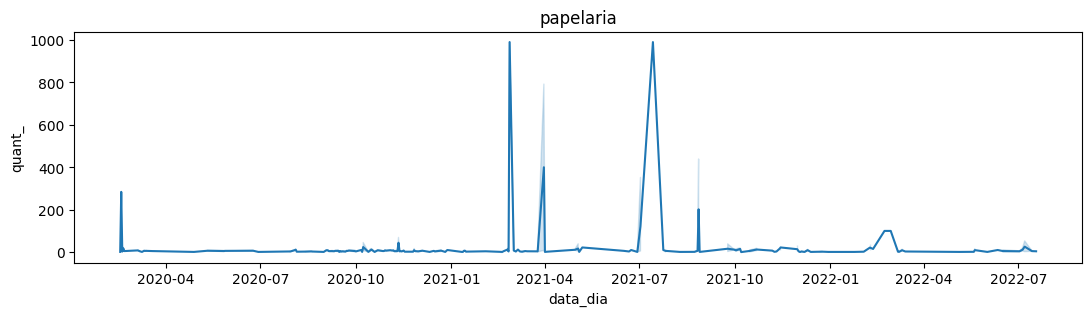

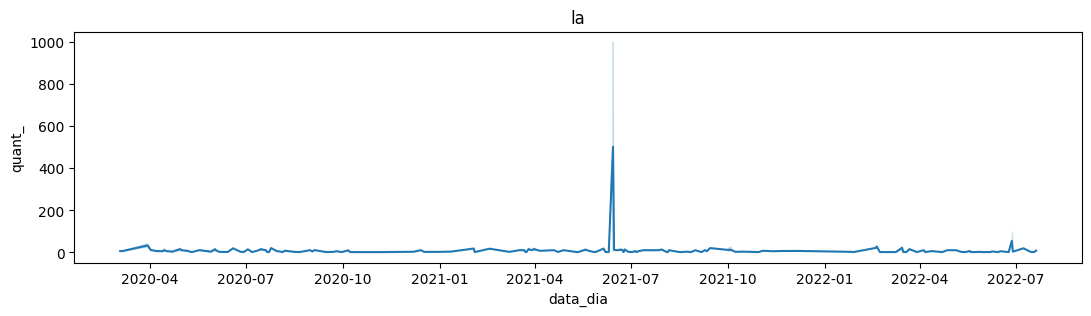

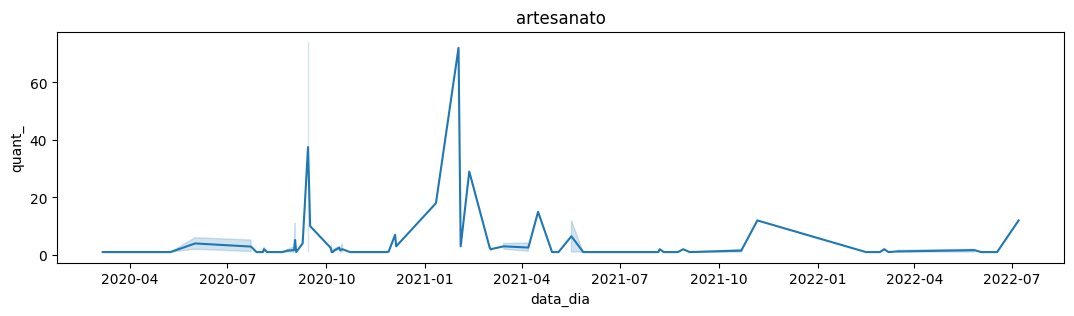

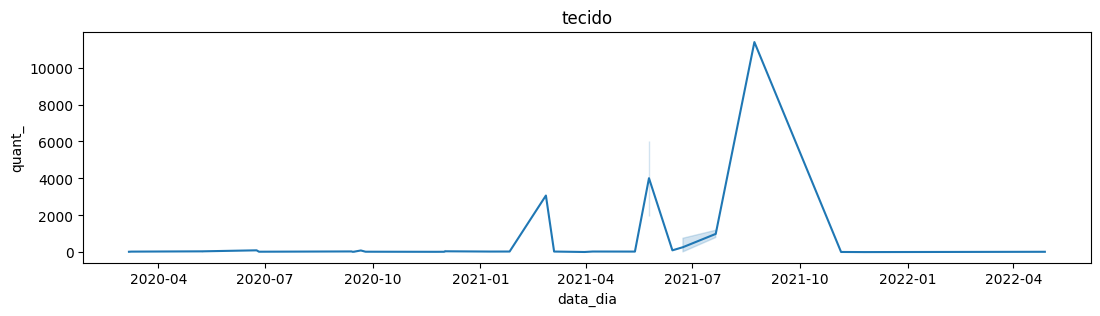

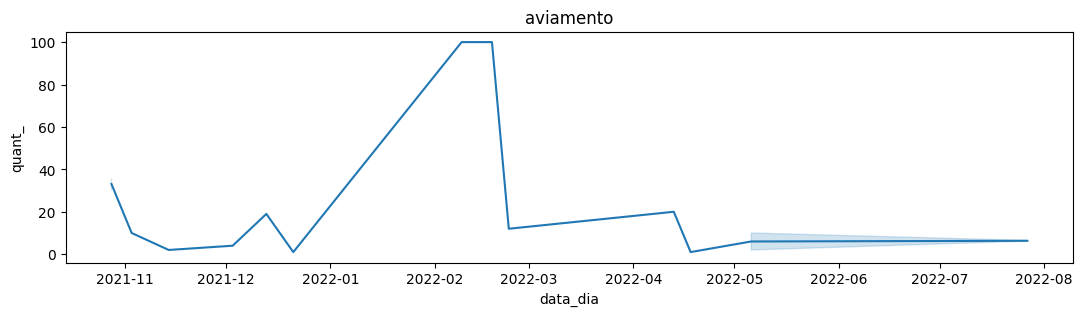

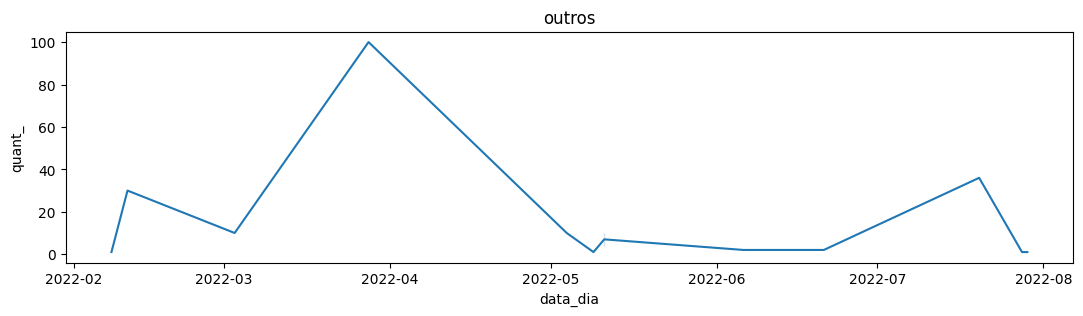

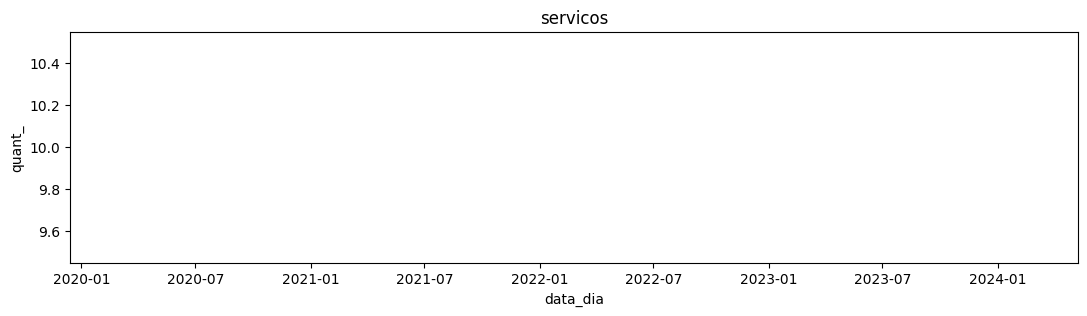

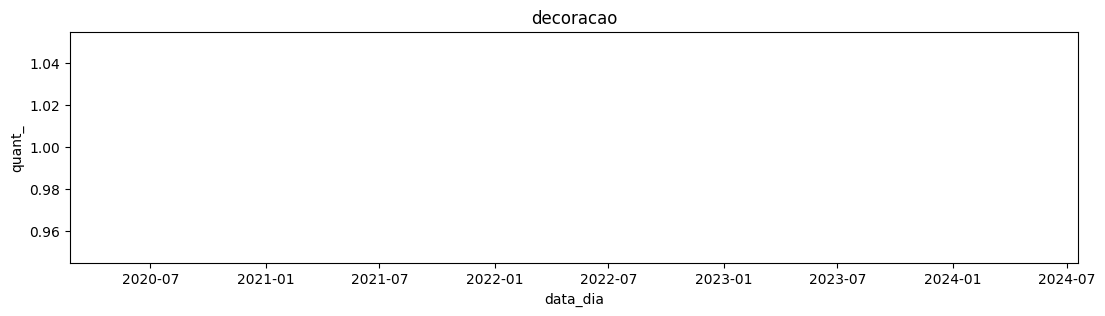

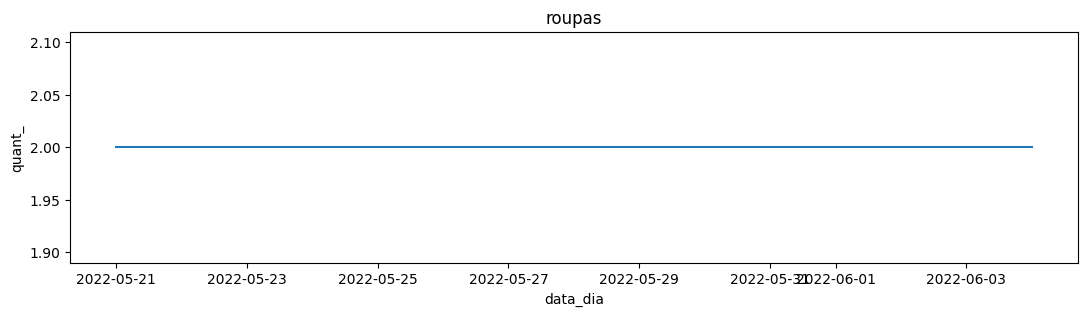

In [80]:
#sns timeplot hue categoria dataframe_transacoes_produto_tratado_2 by venda and data
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (13,3)
fig, ax = plt.subplots()
#create a time plot 
for categoria in modelo_transac_prod_estoque['categoria'].unique():
    modelo_transac_prod_estoque_categoria =modelo_transac_prod_estoque_diario[modelo_transac_prod_estoque_diario['categoria'] == categoria]
    sns.lineplot(x='data_dia', y=(modelo_transac_prod_estoque_categoria['quant_']), data=modelo_transac_prod_estoque_diario)
    plt.title(categoria)
    plt.show()



Por conta da falta da presença de registros das entradas de produtos, que não condizem com a sua variação em venda(i.e. saída de produtos do inventário), nos dá um material de hipótese na qual há mais estoque do que aquilo presente em sistema de produtos. Um exmeplo disso, são os dados de estocagem de itens da classificação como de roupas ou decoração. Portanto, desconsideraremos essas categorias da massa usada para o modelo. Além disso, por conta da falta de registros em estoque, consideraremos a premissa de que o modelo será uma análise preditiva futura de necessidade de estoque devolvendo, um valor mínimo de demanda, na qual o estoque a ser feito possa suprí-lo considerando as demais variáveis de oferta e demanda do mercado de distribuidores dos materiais ofertados por esse ponto de venda estudado. Desta maneira, consideremos como a quantidade de vendas como a saída de produtos no estoque. Isso foi invertido a valor positivo para que facilite a análise.

In [105]:
modelo_transac_prod_estoque_diario_ajust = modelo_transac_prod_vendas_diario.query('categoria != "servicos" & categoria != "roupas" & categoria != "decoracao"')

In [82]:
modelo_transac_prod_estoque_diario_ajust

,numero,categoria,data_dia,quant_,qtd_norm,total
0,11637,linha,2020-09-13,4.00,0.003988,8.00
1,11638,linha,2020-09-13,2.00,0.001988,17.00
2,11639,linha,2020-09-13,1.00,0.000988,8.50
3,11640,linha,2020-09-13,4.00,0.003988,34.00
4,11641,linha,2020-09-13,1.00,0.000988,12.90
...,...,...,...,...,...,...
12167,38248,papelaria,2022-07-29,1.00,0.000988,16.80
12168,38251,armarinho,2022-07-30,1.00,0.000988,5.80
12169,38251,linha,2022-07-30,2.00,0.001988,6.00
12170,38252,armarinho,2022-07-30,100.00,0.099989,28.00


In [122]:
#dickey  fuller test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
        
        #Determing rolling statistics
        rolmean = timeseries.rolling(24).mean()
        rolstd = timeseries.rolling(24).std()
    
        #Plot rolling statistics:
        orig = plt.plot(timeseries, color='brown',label='Original')
        mean = plt.plot(rolmean, color='blue', label='Média móvel')
        std = plt.plot(rolstd, color='green', label = 'Desvio padrão móvel')
        plt.legend(loc='best')
        plt.title('Média móvel e desvio padrão')
        plt.show(block=False)
    
        #Perform Dickey-Fuller test:
        print ('Results of Dickey-Fuller Test:')
        dftest = adfuller(timeseries, autolag='AIC',maxlag=4)
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key,value in dftest[4].items():
            dfoutput['Critical Value (%s)'%key] = value
        print (dfoutput)


In [123]:
modelo_transac_prod_estoque_diario_ajust = modelo_transac_prod_estoque_diario_ajust.sort_values(by=['data_dia'])
modelo_transac_prod_estoque_diario_ajust

,numero,categoria,data_dia,quant_,qtd_norm,total
0,11637,linha,2020-09-13,4.00,0.003988,8.00
13,11650,linha,2020-09-13,2.00,0.001988,33.60
7,11644,linha,2020-09-13,1.00,0.000988,16.50
3,11640,linha,2020-09-13,4.00,0.003988,34.00
4,11641,linha,2020-09-13,1.00,0.000988,12.90
...,...,...,...,...,...,...
12149,38229,papelaria,2022-07-29,1.00,0.000988,4.47
12170,38252,armarinho,2022-07-30,100.00,0.099989,28.00
12168,38251,armarinho,2022-07-30,1.00,0.000988,5.80
12169,38251,linha,2022-07-30,2.00,0.001988,6.00


In [32]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

categoria:linha


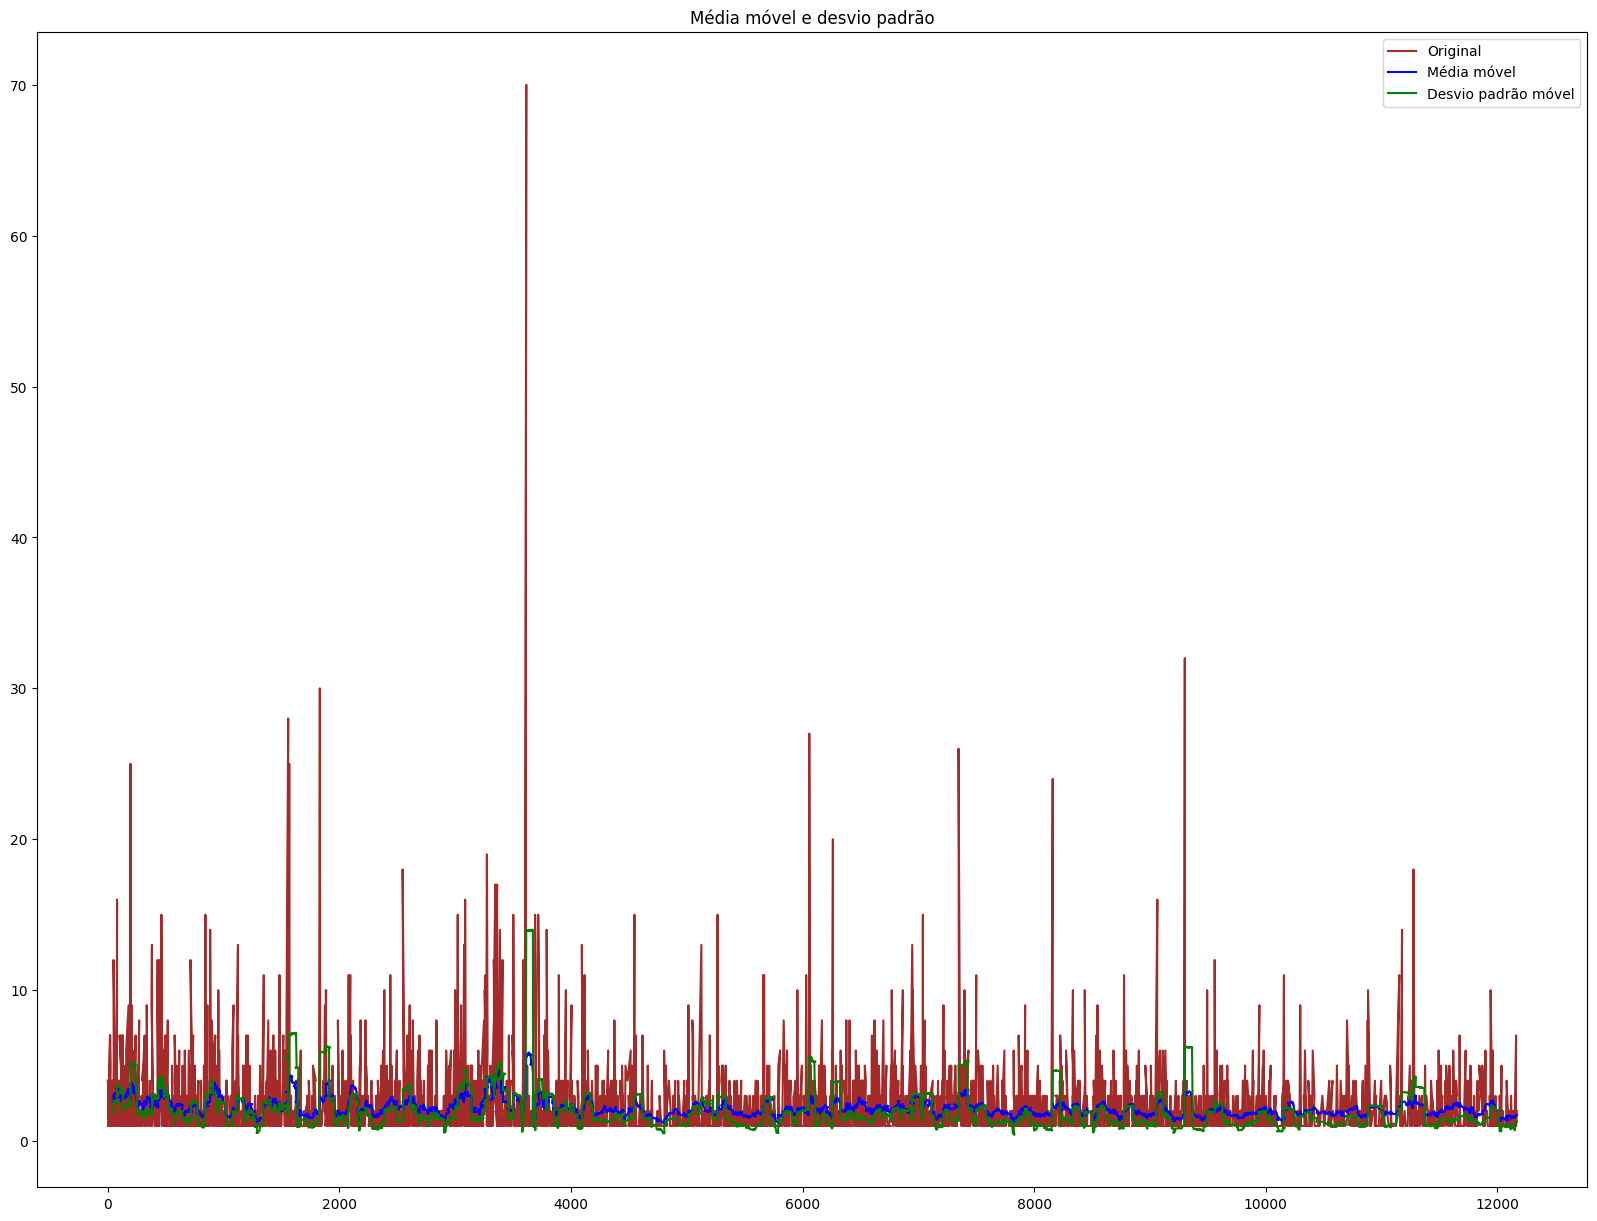

Results of Dickey-Fuller Test:
Test Statistic                  -34.468970
p-value                           0.000000
#Lags Used                        2.000000
Number of Observations Used    4137.000000
Critical Value (1%)              -3.431932
Critical Value (5%)              -2.862239
Critical Value (10%)             -2.567142
dtype: float64
categoria:papelaria


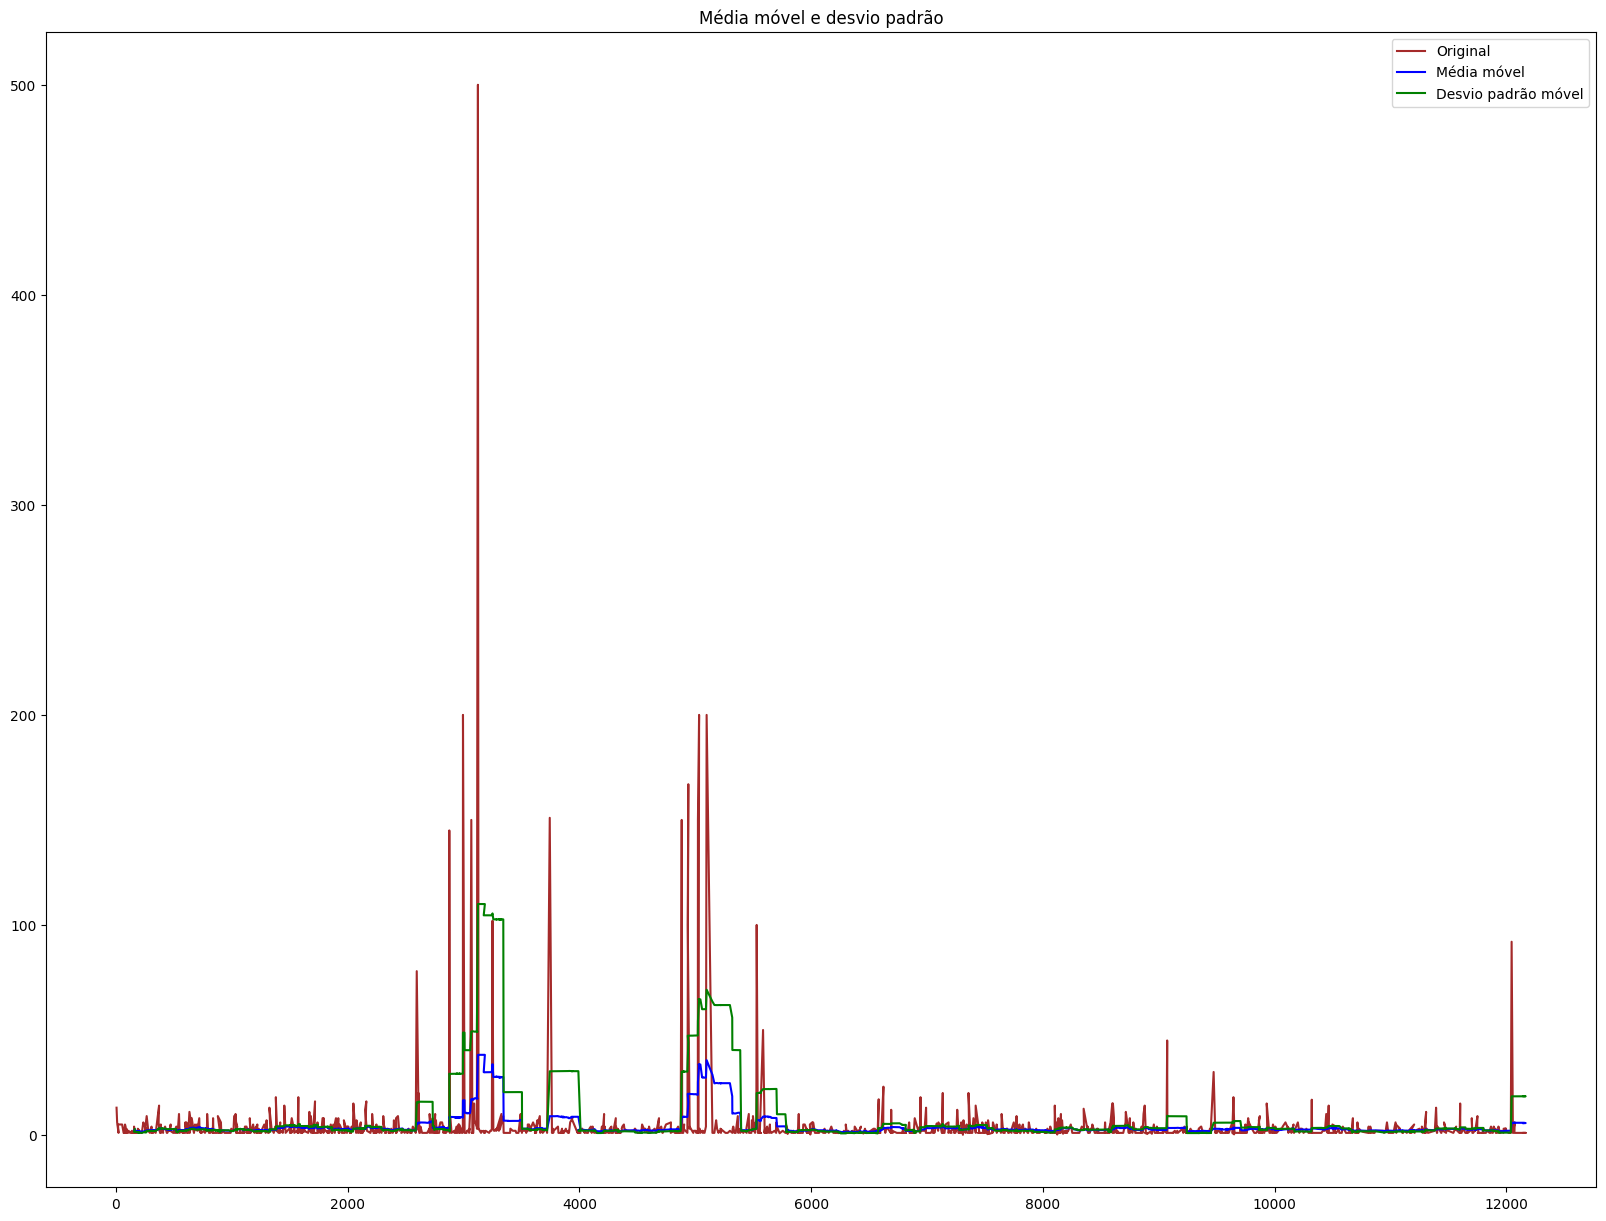

Results of Dickey-Fuller Test:
Test Statistic                  -36.469657
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1541.000000
Critical Value (1%)              -3.434601
Critical Value (5%)              -2.863417
Critical Value (10%)             -2.567769
dtype: float64
categoria:armarinho


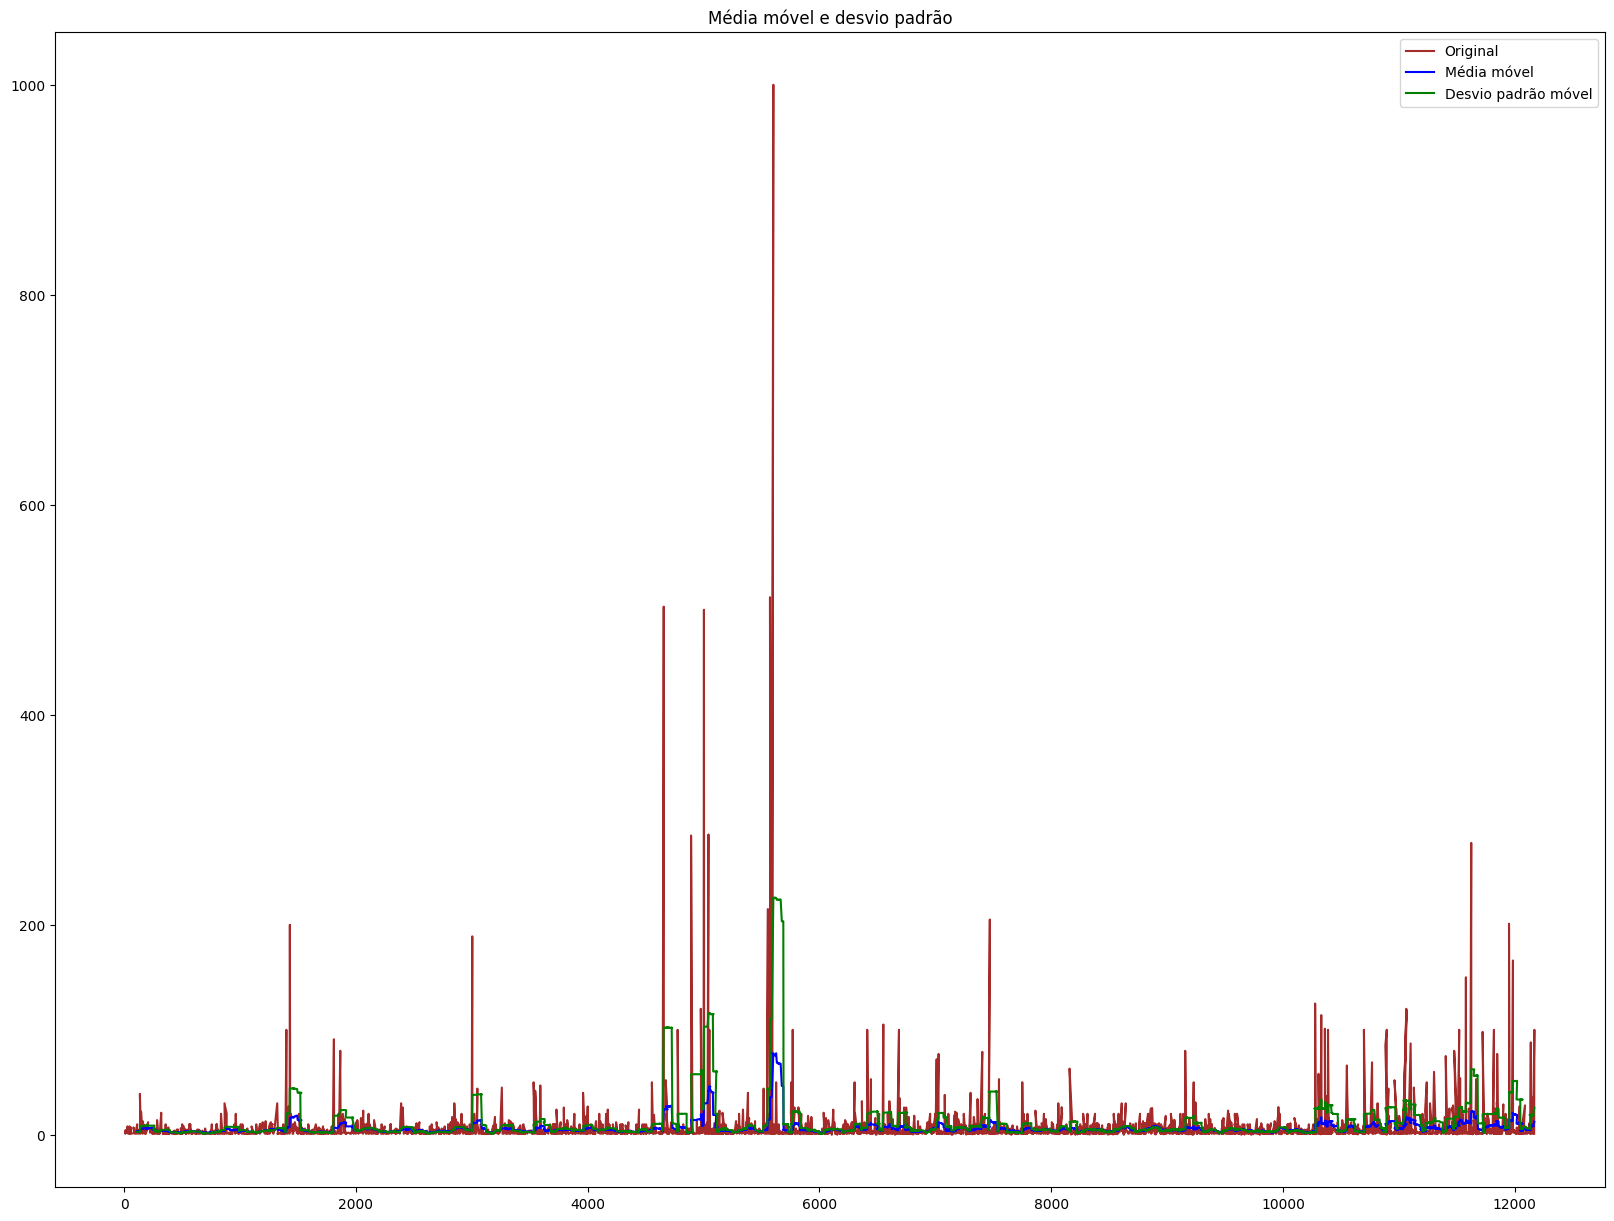

Results of Dickey-Fuller Test:
Test Statistic                  -25.081248
p-value                           0.000000
#Lags Used                        3.000000
Number of Observations Used    3774.000000
Critical Value (1%)              -3.432084
Critical Value (5%)              -2.862306
Critical Value (10%)             -2.567178
dtype: float64
categoria:tecido


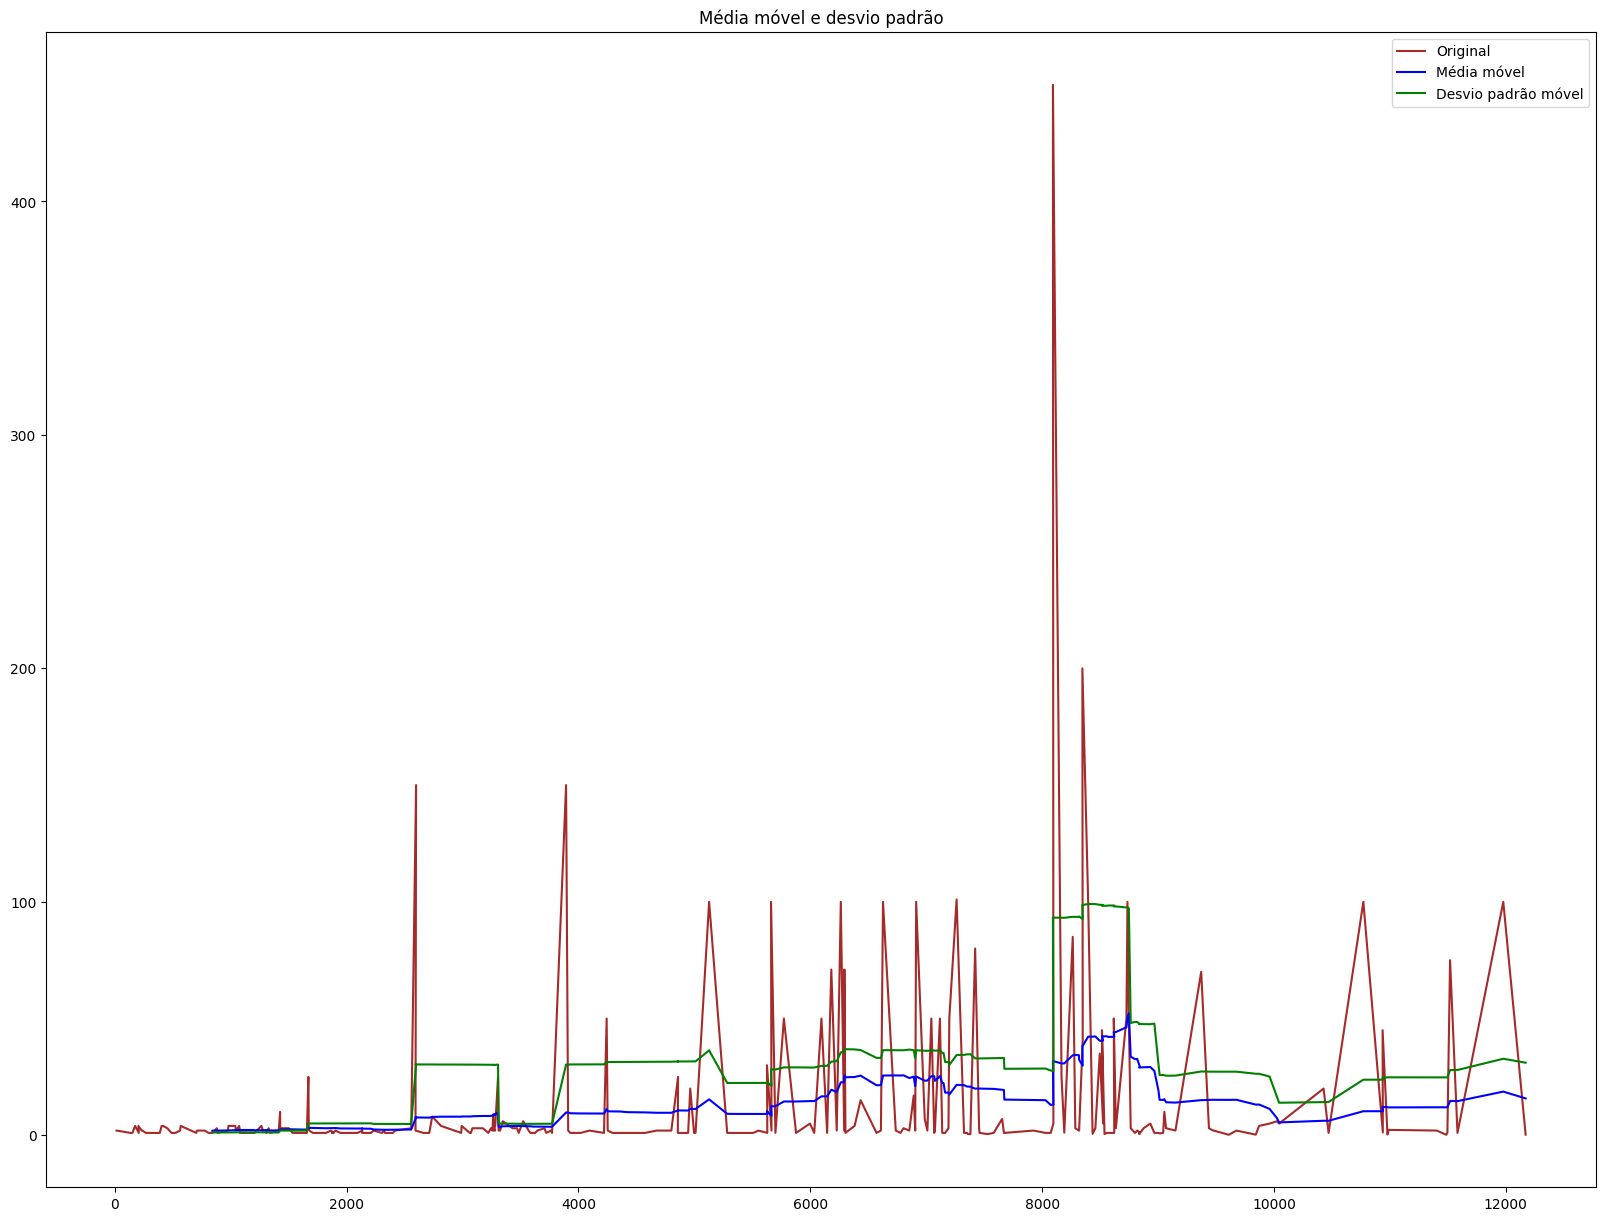

Results of Dickey-Fuller Test:
Test Statistic                -1.555892e+01
p-value                        2.054435e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.620000e+02
Critical Value (1%)           -3.455558e+00
Critical Value (5%)           -2.872636e+00
Critical Value (10%)          -2.572683e+00
dtype: float64
categoria:artesanato


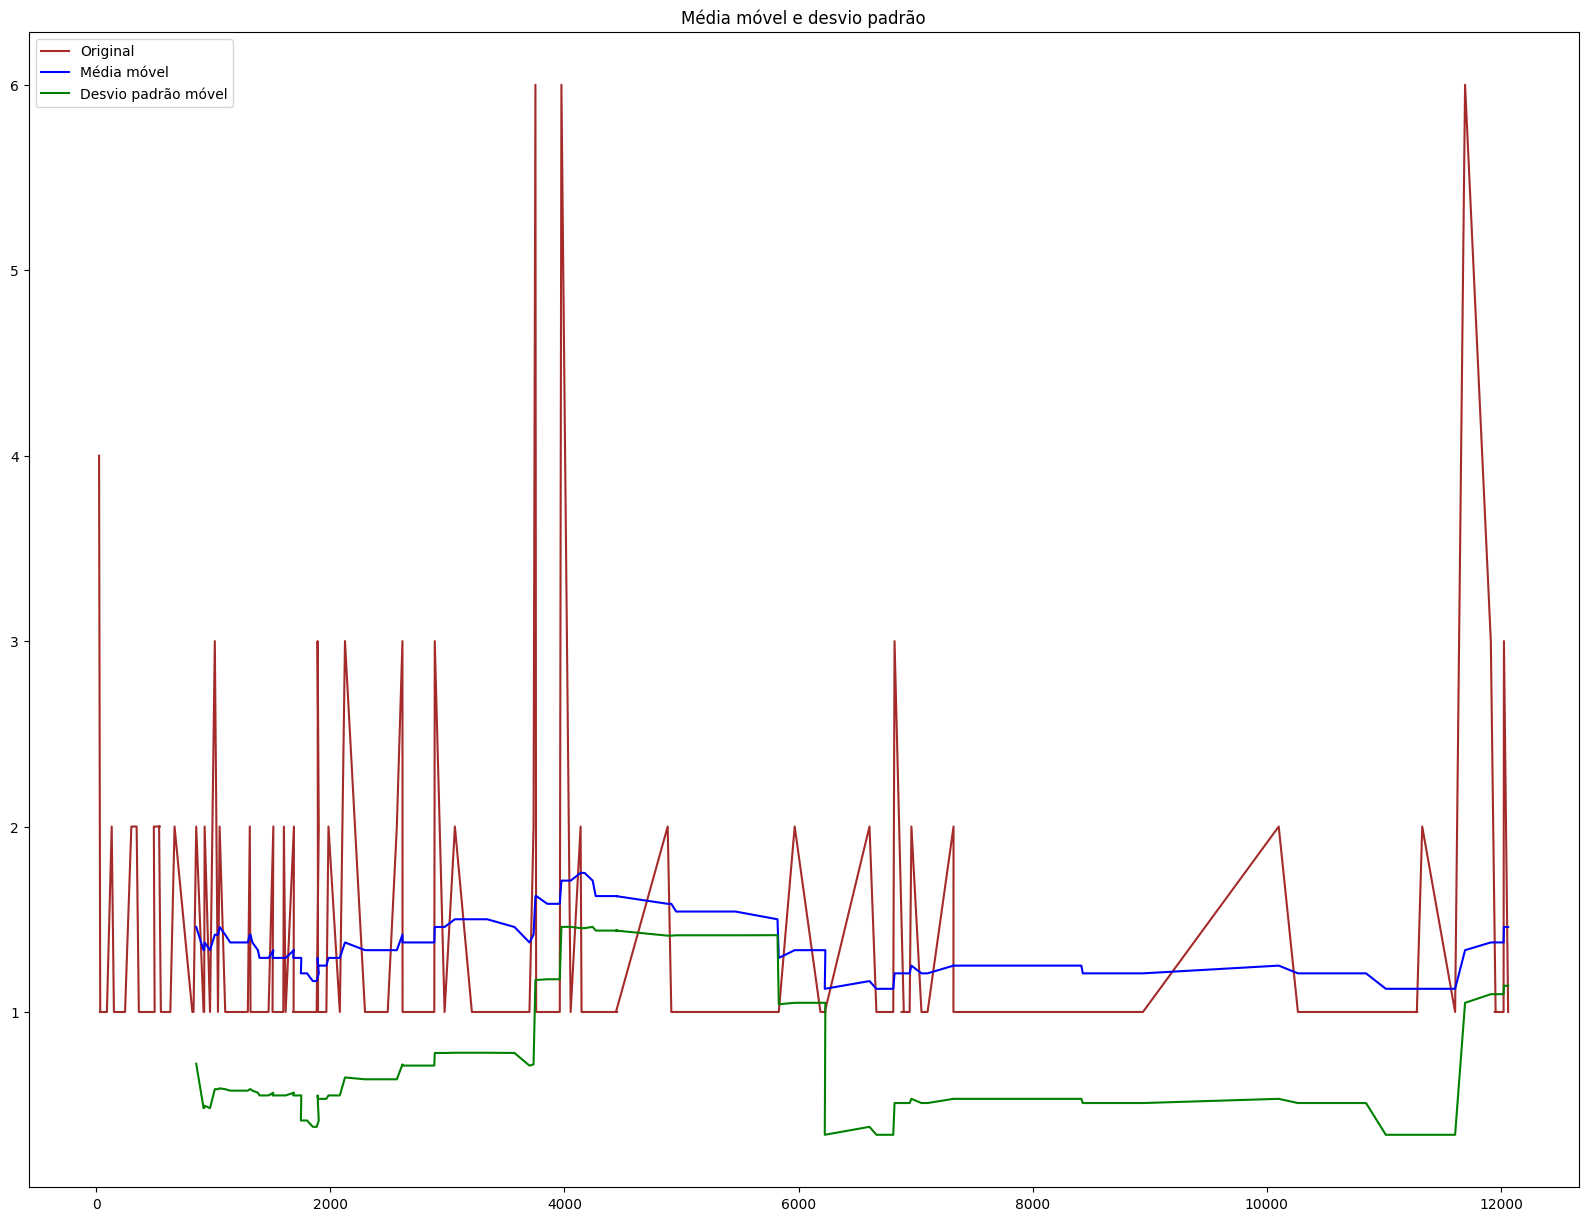

Results of Dickey-Fuller Test:
Test Statistic                  -4.950793
p-value                          0.000028
#Lags Used                       4.000000
Number of Observations Used    151.000000
Critical Value (1%)             -3.474416
Critical Value (5%)             -2.880878
Critical Value (10%)            -2.577081
dtype: float64
categoria:la


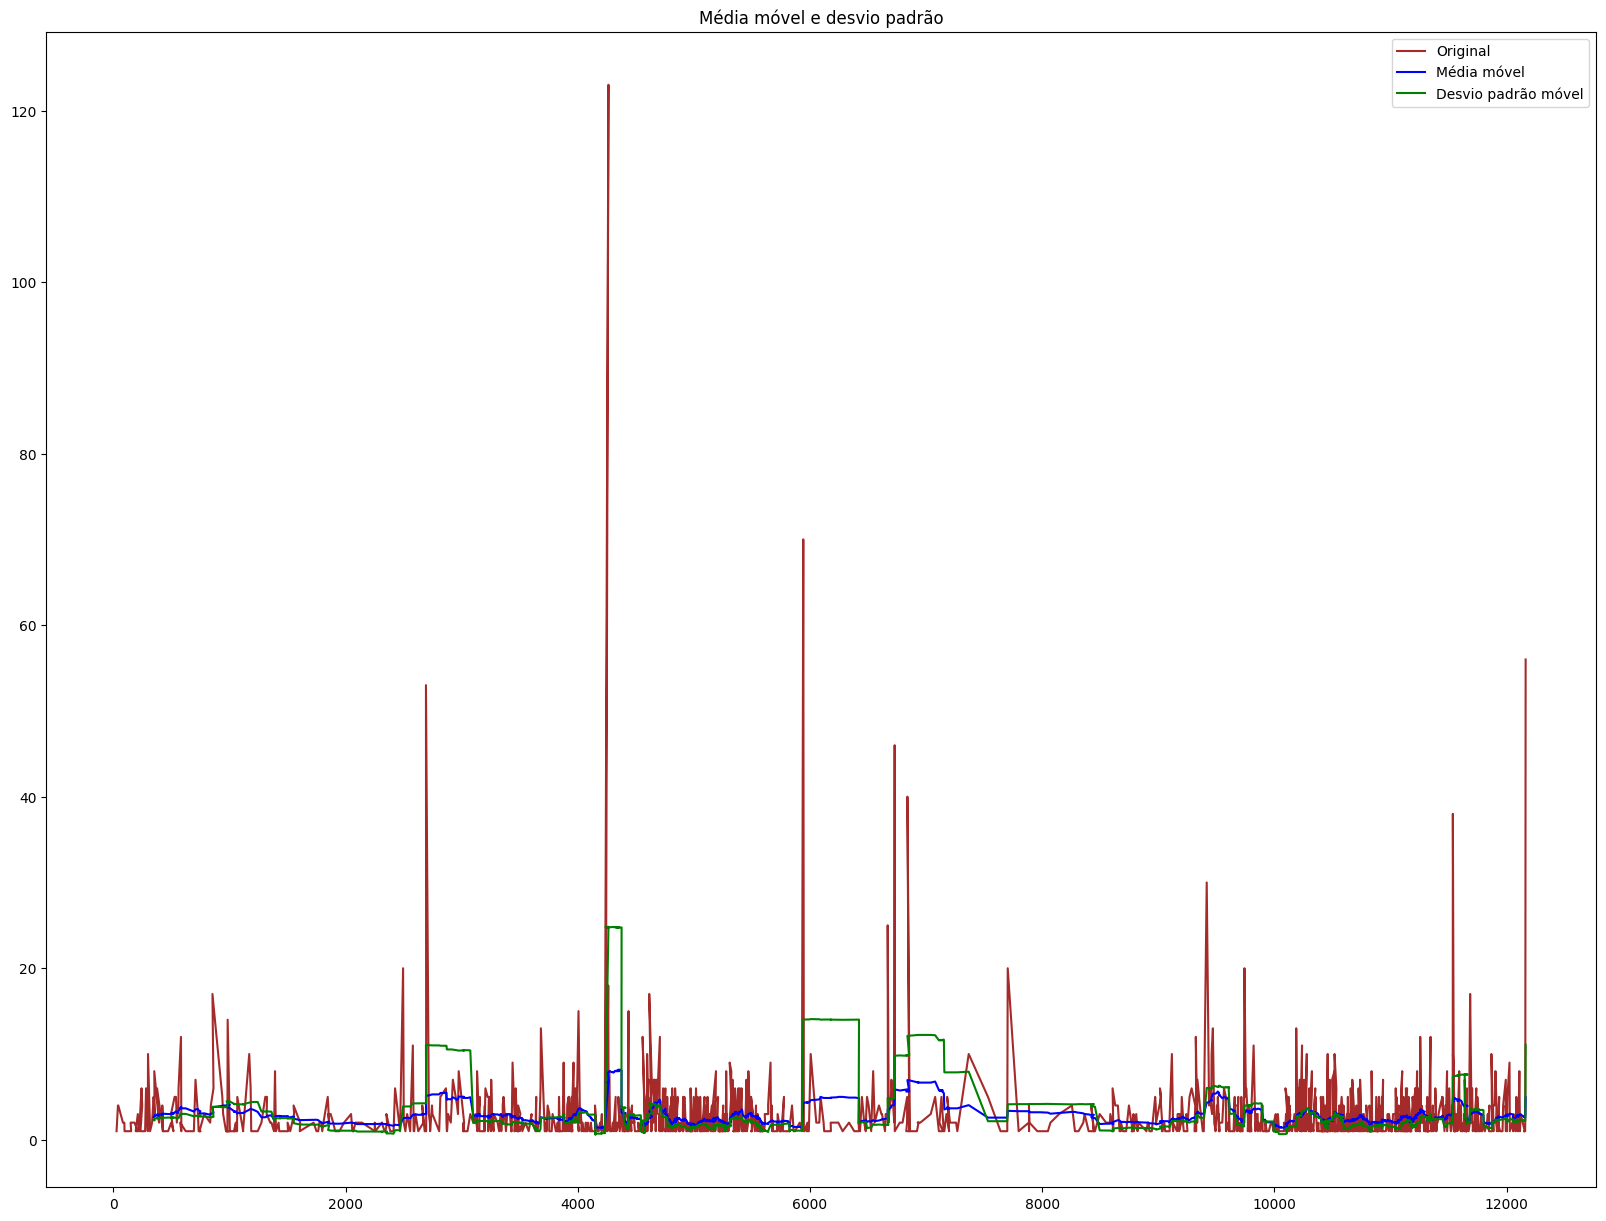

Results of Dickey-Fuller Test:
Test Statistic                  -36.701008
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1474.000000
Critical Value (1%)              -3.434794
Critical Value (5%)              -2.863503
Critical Value (10%)             -2.567815
dtype: float64
categoria:mdf


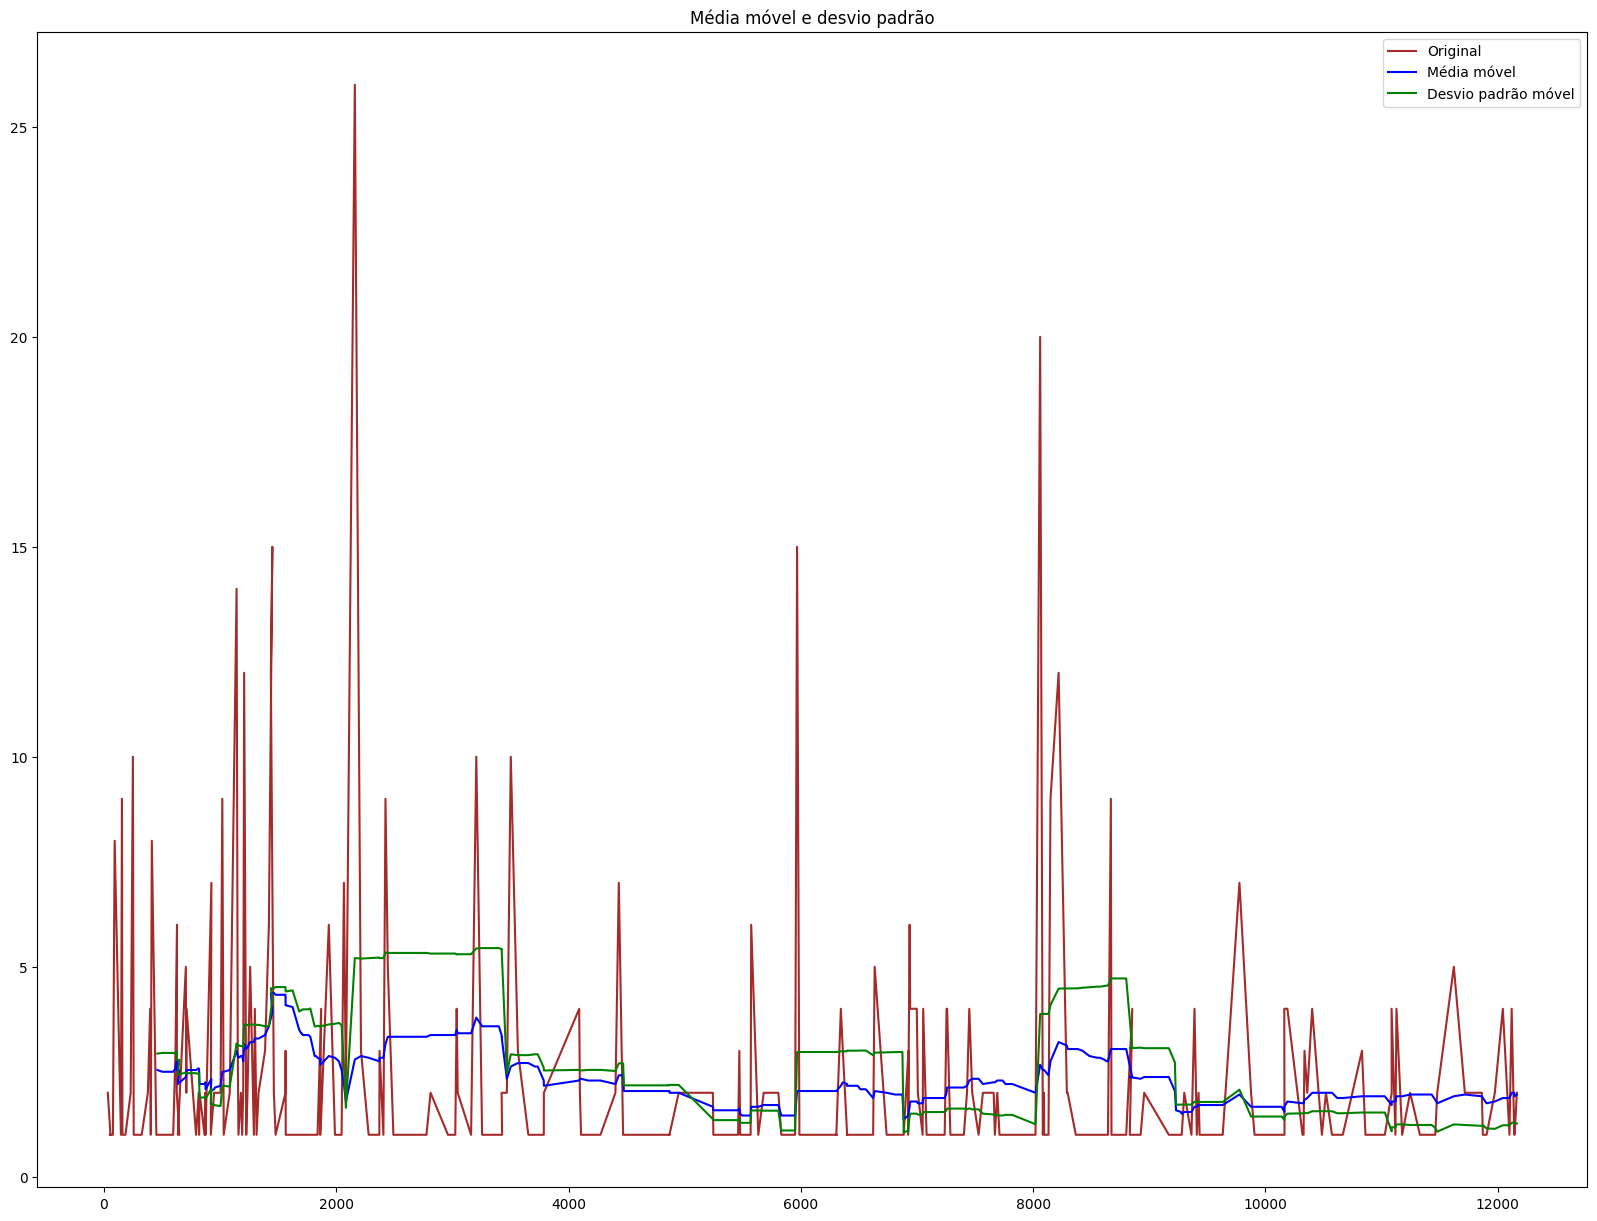

Results of Dickey-Fuller Test:
Test Statistic                -1.638000e+01
p-value                        2.757385e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.970000e+02
Critical Value (1%)           -3.452561e+00
Critical Value (5%)           -2.871321e+00
Critical Value (10%)          -2.571982e+00
dtype: float64
categoria:enxoval


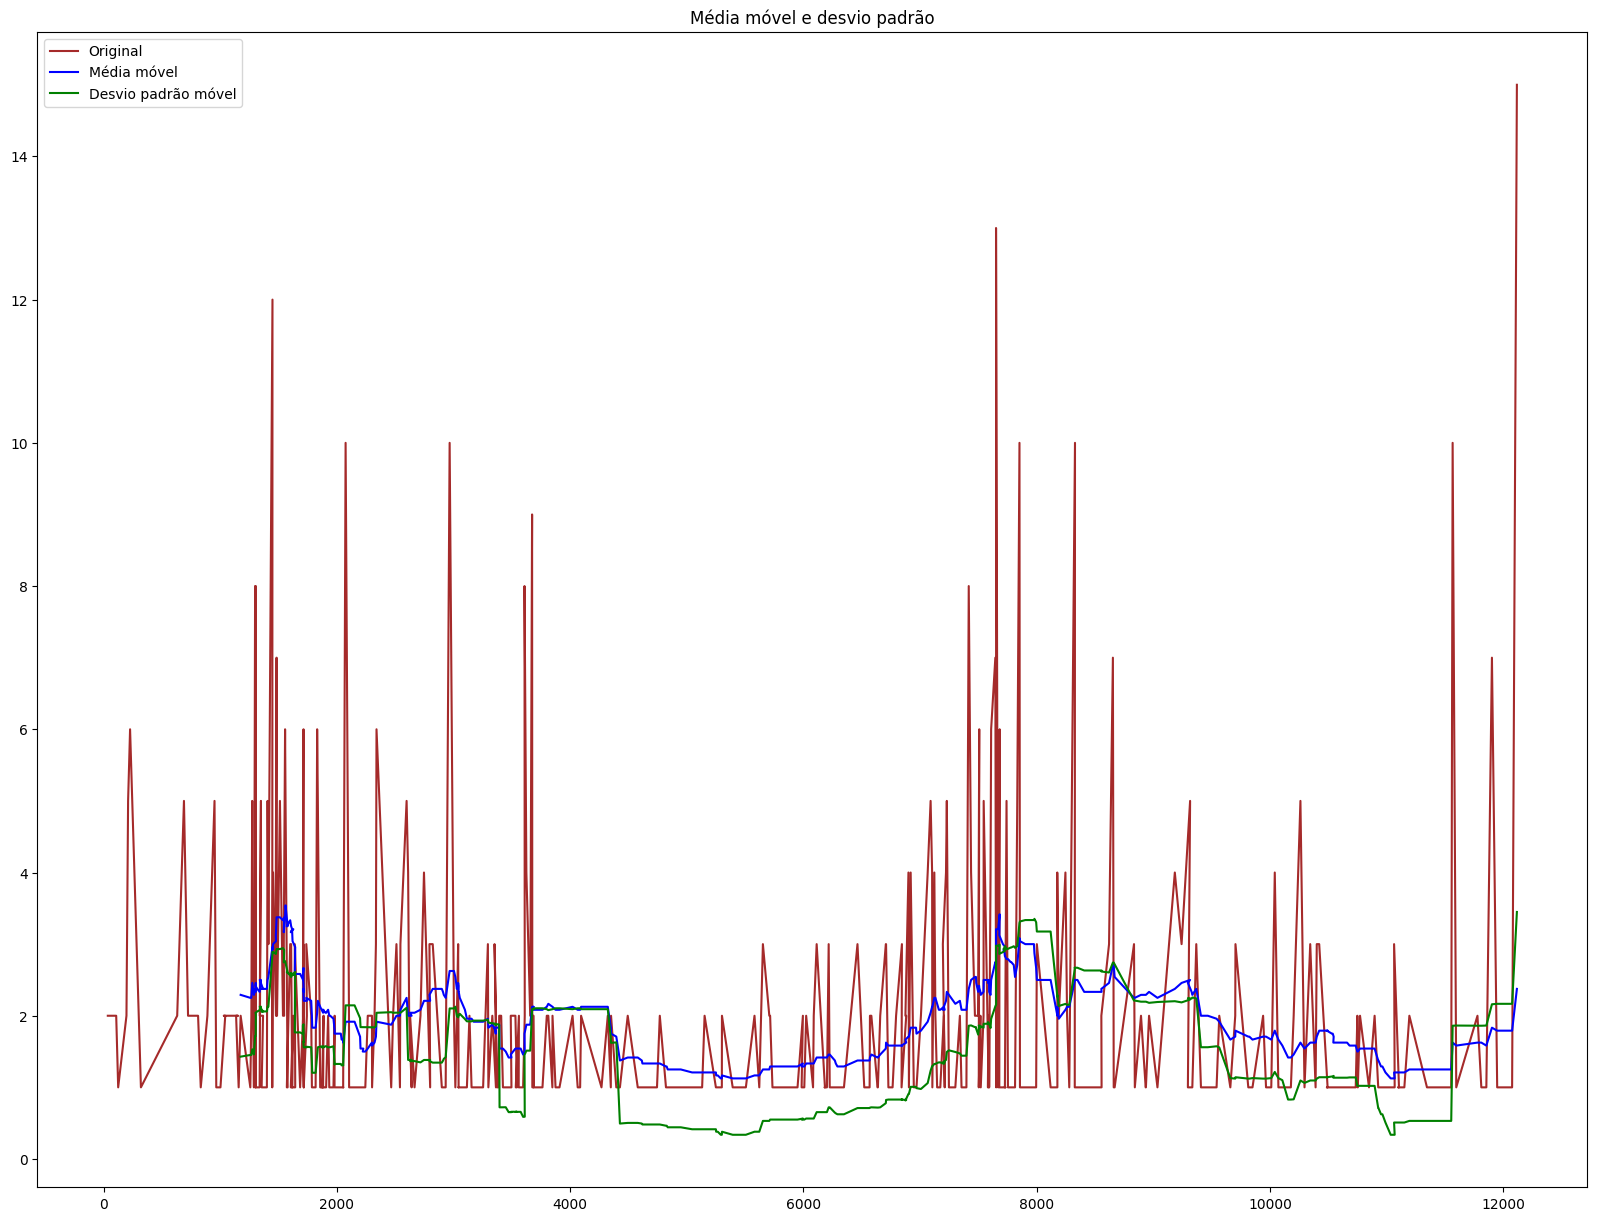

Results of Dickey-Fuller Test:
Test Statistic                -7.619034e+00
p-value                        2.152971e-11
#Lags Used                     4.000000e+00
Number of Observations Used    4.560000e+02
Critical Value (1%)           -3.444772e+00
Critical Value (5%)           -2.867899e+00
Critical Value (10%)          -2.570157e+00
dtype: float64
categoria:aviamento


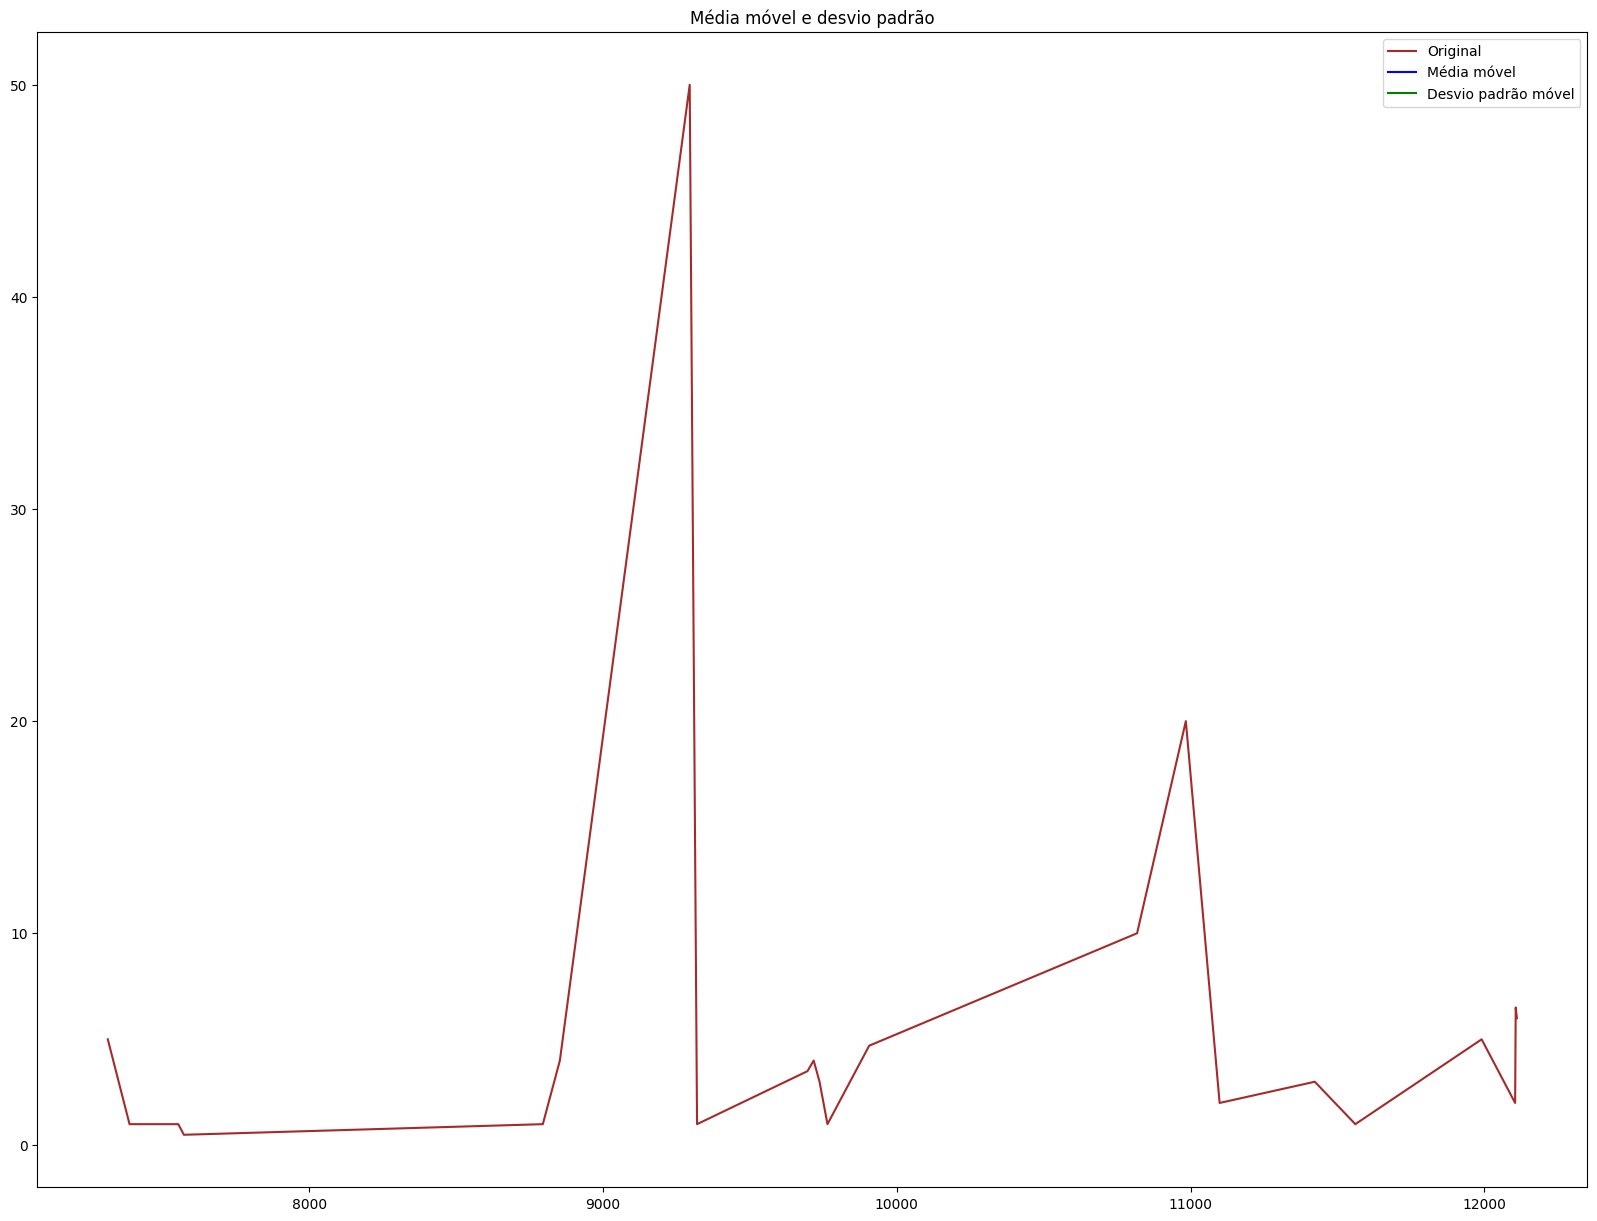

Results of Dickey-Fuller Test:
Test Statistic                 -4.622493
p-value                         0.000117
#Lags Used                      0.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64
categoria:outros


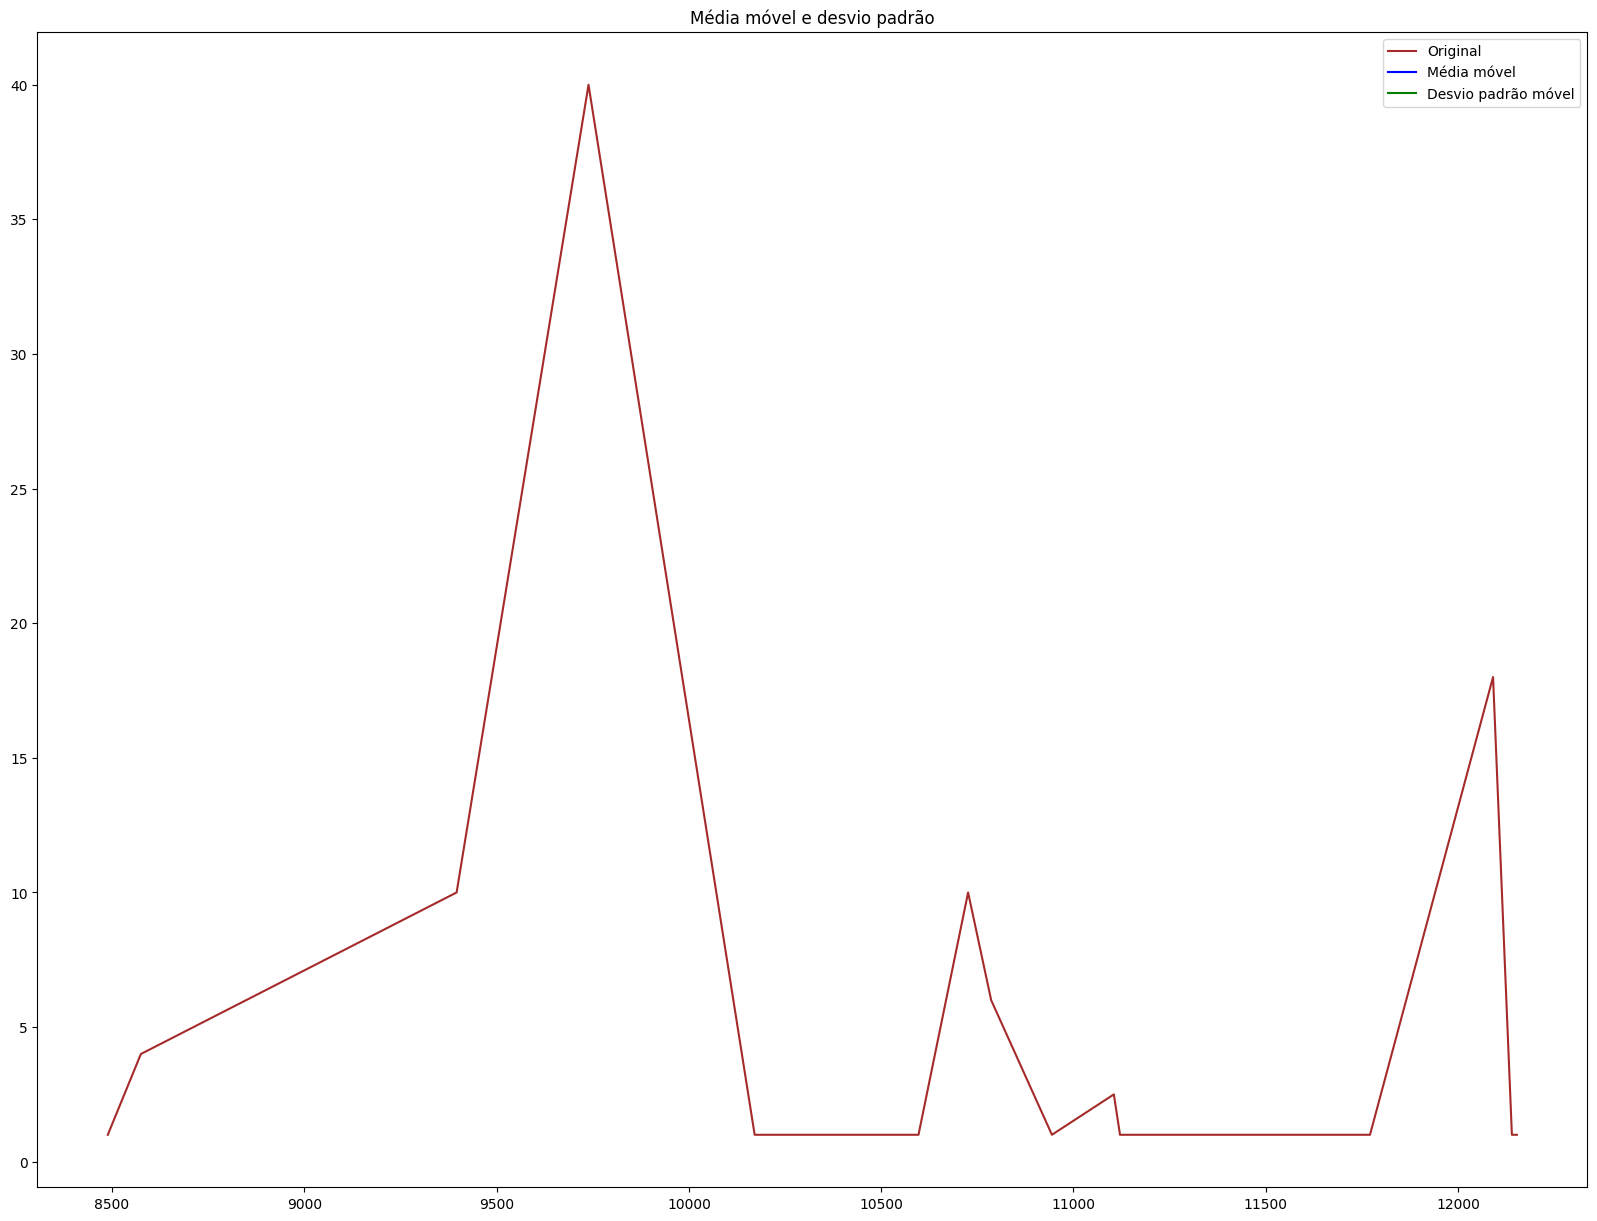

Results of Dickey-Fuller Test:
Test Statistic                 -3.912964
p-value                         0.001941
#Lags Used                      0.000000
Number of Observations Used    18.000000
Critical Value (1%)            -3.859073
Critical Value (5%)            -3.042046
Critical Value (10%)           -2.660906
dtype: float64


In [124]:
for categoria in modelo_transac_prod_estoque_diario_ajust['categoria'].unique():
    modelo_transac_prod_estoque_diario_ajust_categoria = modelo_transac_prod_estoque_diario_ajust[modelo_transac_prod_estoque_diario_ajust['categoria'] == categoria]
    print('categoria:{0}'.format(categoria))
    test_stationarity(modelo_transac_prod_estoque_diario_ajust_categoria['quant_'])
#    plot_acf(modelo_transac_prod_vendas_categoria['quant_'])
#   plot_pacf(modelo_transac_prod_vendas_categoria['quant_'])

    

In [ ]:
## Com isso removeremos a sazonalidade e a tendência dos dados, para que possamos aplicar o modelo ARIMA.

#Removendo a sazonalidade e a tendência dos dados


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
#multiplicative_decomposition = seasonal_decompose(dataframe_transacoes_produto_tratado_2['quant_'], model='multiplicative', period=30)
for categoria in modelo_transac_prod_vendas['categoria'].unique():
    modelo_transac_prod_vendas_categoria = modelo_transac_prod_vendas[modelo_transac_prod_vendas['categoria'] == categoria]
    print('categoria:{0}'.format(categoria))
# Additive Decomposition
    additive_decomposition = seasonal_decompose(modelo_transac_prod_vendas_categoria['quant_'], model='additive', period=60)
# Multiplicative Decomposition
    multiplicative_decomposition = seasonal_decompose(modelo_transac_prod_vendas_categoria['quant_'], model='multiplicative', period=30)
# Plot
    plt.rcParams.update({'figure.figsize': (16,12)})
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
    multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    plt.show()

NameError: name 'modelo_transac_prod_vendas' is not defined

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from statsmodels.tsa.arima.model import ARIMAResultsWrapper



data1 = modelo_transac_prod_vendas_1.query('categoria == "enxoval"')
data = data1['quant_']
out = 'AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}'


NameError: name 'modelo_transac_prod_vendas_1' is not defined

In [ ]:
res = AutoReg(data, lags = [1, 11, 12]).fit()


res.summary()


c:\Users\otavi\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                 quant_   No. Observations:                  461
Model:             Restr. AutoReg(12)   Log Likelihood                -920.669
Method:               Conditional MLE   S.D. of innovations              1.881
Date:                Mon, 26 Sep 2022   AIC                           1851.339
Time:                        22:29:52   BIC                           1871.874
Sample:                            12   HQIC                          1859.433
                                  461                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7031      0.181      9.406      0.000       1.348       2.058
quant_.L1      0.0705      0.050      1.412      0.158      -0.027       0.168
quant_.L11     0.1173      0.051      2.307      0.021       0.018       0.217
quant_.L12    -0.0344      0.051     -0.673      0.501      -0.135       0.066
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.1449           -0.3304j            1.1916           -0.4553
AR.2            -1.1449           +0.3304j            1.1916            0.4553
AR.3            -0.7953           -0.8930j            1.1958           -0.3658
AR.4            -0.7953           +0.8930j            1.1958            0.3658
AR.5            -0.1971           -1.1889j            1.2051           -0.2761
AR.6            -0.1971           +1.1889j            1.2051            0.2761
AR.7             0.4782           -1.1232j            1.2208           -0.1859
AR.8             0.4782           +1.1232j            1.2208            0.1859
AR.9             1.0309           -0.6936j            1.2425           -0.0943
AR.10            1.0309           +0.6936j            1.2425            0.0943
AR.11            1.2563           -0.0000j            1.2563           -0.0000
AR.12            3.4067           -0.0000j            3.4067           -0.0000
------------------------------------------------------------------------------
"""

In [ ]:
plot_res = res.plot_diagnostics(figsize=(15, 12))

NameError: name 'res' is not defined

In [ ]:
res.plot_predict(dynamic=False)
plt.show()

NameError: name 'res' is not defined

In [ ]:
res_2 = ARIMA(data, order=(1, 1, 2)).fit()

print(out.format(res_2.aic, res_2.hqic, res_2.bic))

NameError: name 'data' is not defined

In [ ]:
res_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 quant_   No. Observations:                  461
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -944.241
Date:                Mon, 26 Sep 2022   AIC                           1896.482
Time:                        23:05:49   BIC                           1913.007
Sample:                             0   HQIC                          1902.989
                                - 461                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9437      0.134     -7.017      0.000      -1.207      -0.680
ma.L1          0.0044      0.121      0.037      0.971      -0.233       0.241
ma.L2         -0.9201      0.115     -7.974      0.000      -1.146      -0.694
sigma2         3.5329      0.093     38.141      0.000       3.351       3.714
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              3223.02
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.39   Skew:                             2.92
Prob(H) (two-sided):                  0.04   Kurtosis:                        14.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

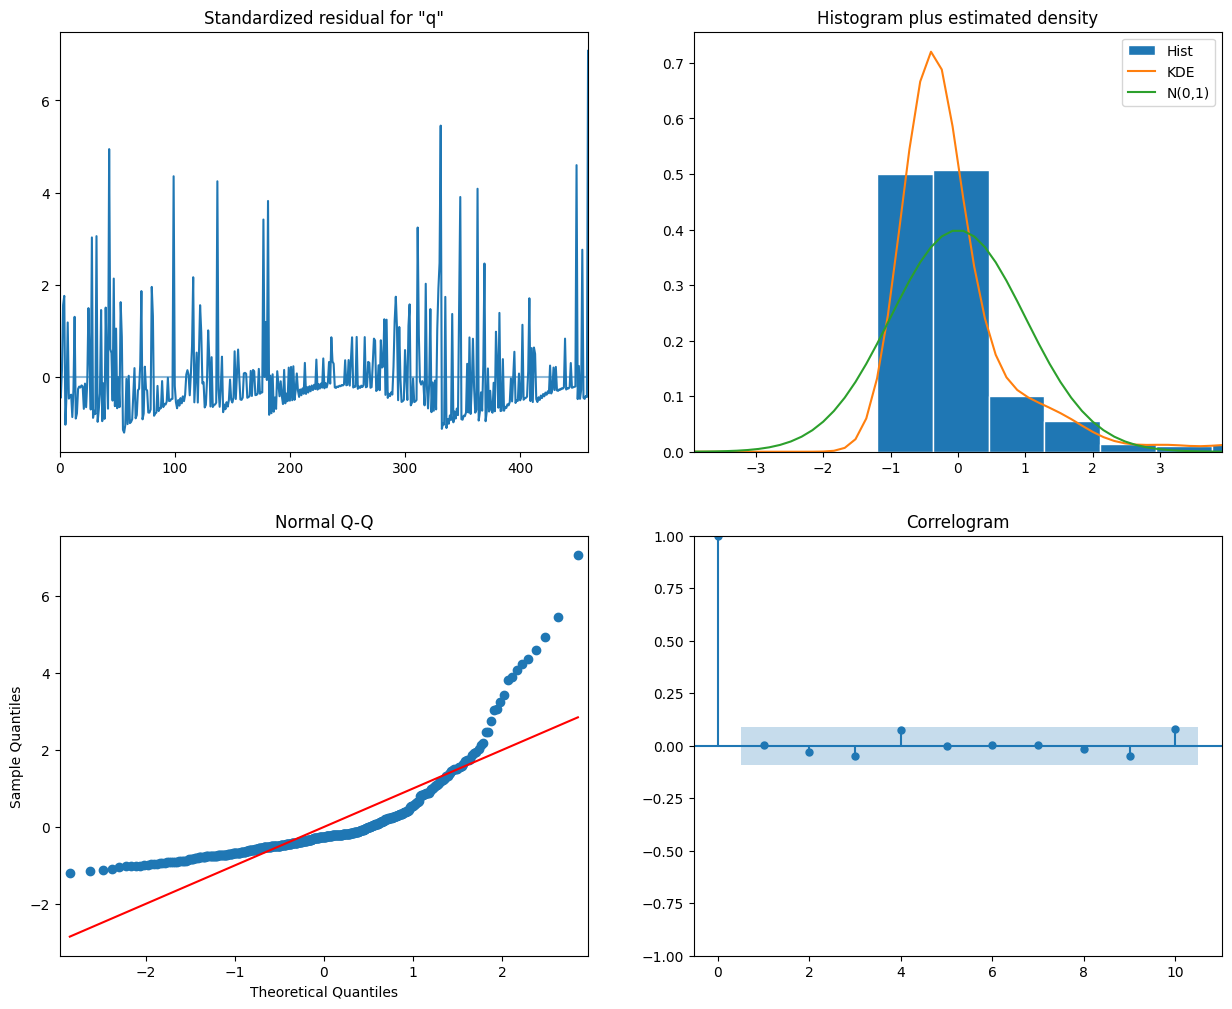

In [ ]:
plot = res_2.plot_diagnostics(figsize=(15, 12))

In [ ]:
res_2.plot_predict(dynamic=False)
plt.show()

AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'

In [ ]:

from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.arima.model import ARIMAResults
from statsmodels.tsa.arima.model import ARIMAResultsWrapper
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
corr = modelo_transac_prod_vendas.corr()
corr.style.background_gradient(cmap='coolwarm')

,numero,quant_,total,qtd_norm
numero,1.000000,0.018983,0.023482,0.018983
quant_,0.018983,1.000000,0.090436,1.000000
total,0.023482,0.090436,1.000000,0.090436
qtd_norm,0.018983,1.000000,0.090436,1.000000


In [ ]:
modelo_transac_prod_vendas_1 = modelo_transac_prod_vendas[['numero','categoria','data_dia','quant_','qtd_norm','total']]

NameError: name 'modelo_transac_prod_vendas' is not defined

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

plot_acf(modelo_transac_prod_vendas_1.values)


NameError: name 'modelo_transac_prod_vendas_1' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder

ARIMA method for time series forecasting
    
    from statsmodels.tsa.arima_model import ARIMA
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_absolute_percentage_error
    from sklearn.metrics import median_absolute_error
    from sklearn.metrics import max_error
    from sklearn.metrics import explained_variance_score
    from sklearn.metrics import mean_poisson_deviance
    from sklearn.metrics import mean_gamma_deviance
    from sklearn.metrics import mean_tweedie_deviance
    from sklearn.metrics import mean_absolute_percentage_error
    from sklearn.metrics import median_absolute_error
    from sklearn.metrics import max_error
    from sklearn.metrics import explained_variance_score
    from sklearn.metrics import mean_poisson_deviance
    from sklearn.metrics import mean_gamma_deviance
    from sklearn.metrics import mean_tweedie_deviance
    from sklearn.metrics import mean_absolute_percentage_error
    from sklearn.metrics import median_absolute_error
    from sklearn.metrics import max_error
    from sklearn.metrics import explained_variance_score
    from sklearn.metrics import mean_poisson_deviance
    from sklearn.metrics import mean_gamma_deviance
    from sklearn.metrics import mean_tweedie_deviance
    from sklearn.metrics import mean_absolute_percentage_error
    from sklearn.metrics import median_absolute_error
    from sklearn.metrics import max_error
    from sklearn.metrics import explained_variance_score
    from sklearn.metrics import mean_poisson_deviance
    from sklearn.metrics import mean_gamma_deviance
    from sklearn.metrics import mean_tweedie_deviance
    from sklearn.metrics import mean_absolute_percentage_error
    from sklearn.metrics import median_absolute_error
    from sklearn.metrics import max_error
    from sklearn.metrics import explained_variance_score
    from sklearn.metrics import mean_poisson_deviance
    from sklearn.metrics import mean_gamma_deviance
    from sklearn.metrics import mean_tweedie_deviance
    from sklearn.metrics import mean_absolute_percentage_error
    from sklearn.metrics import median_absolute_error
    from sklearn.metrics import max_error
    from sklearn.metrics import explained_variance_score
    from sklearn.metrics import mean_poisson_deviance
    from sklearn.metrics import mean_gamma_deviance
    from sklearn.metrics import mean_tweedie_deviance
    from sklearn.metrics import mean_absolute_percentage_error
    from sklearn.metrics import median_absolute_error
    from sklearn.metrics import max_error
    from sklearn.metrics import explained_variance_score
    from sklearn.metrics import mean_poisson_deviance
    from sklearn.metrics import mean_gamma_deviance
    from sklearn.metrics import mean_tweedie_deviance
    from sklearn.metrics import mean_absolute_percentage_error



NameError: name 'ARIMA' is not defined

In [ ]:
g = sns.PairGrid(dataframe_transacoes_produto_tratado[dataframe_transacoes_produto_tratado['tipo'] == 'Ajuste de Estoque +'],hue='tipo')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

In [ ]:
g = sns.PairGrid(dataframe_transacoes_produto_tratado[dataframe_transacoes_produto_tratado['tipo'] == 'Ajuste de Estoque -'],hue='tipo')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [ ]:
# Plot
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for categoria in dataframe_transacoes_produto_tratado_2['categoria'].unique():
    for i, ax in enumerate(axes.flatten()):
        data = dataframe_transacoes_produto_tratado_2[dataframe_transacoes_produto_tratado_2.columns[i]]
        ax.plot(data, color='blue', linewidth=1)
        # Decorations
        ax.set_title(dataframe_transacoes_produto_tratado_2.columns[i])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines["top"].set_alpha(0)
        ax.tick_params(labelsize=6)

plt.tight_layout()

Testing Causation using Granger’s Causality Test
The basis behind Vector AutoRegression is that each of the time series in the system influences each other. That is, you can predict the series with past values of itself along with other series in the system.

Using Granger’s Causality Test, it’s possible to test this relationship before even building the model.

So what does Granger’s Causality really test?

Granger’s causality tests the null hypothesis that the coefficients of past values in the regression equation is zero.

In simpler terms, the past values of time series (X) do not cause the other series (Y). So, if the p-value obtained from the test is lesser than the significance level of 0.05, then, you can safely reject the null hypothesis.

The below code implements the Granger’s Causality test for all possible combinations of the time series in a given dataframe and stores the p-values of each combination in the output matrix.

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(dataframe_transacoes_produto_tratado_2, variables = df.columns)        

ValueError: could not convert string to float: 'tecido'

So how to read the above output?

The row are the Response (Y) and the columns are the predictor series (X).
For example, if you take the value 0.0003 in (row 1, column 2), it refers to the p-value of pgnp_x causing rgnp_y. Whereas, the 0.000 in (row 2, column 1) refers to the p-value of rgnp_y causing pgnp_x.

So, how to interpret the p-values?

If a given p-value is < significance level (0.05), then, the corresponding X series (column) causes the Y (row).

For example, P-Value of 0.0003 at (row 1, column 2) represents the p-value of the Grangers Causality test for pgnp_x causing rgnp_y, which is less that the significance level of 0.05.

So, you can reject the null hypothesis and conclude pgnp_x causes rgnp_y.

Looking at the P-Values in the above table, you can pretty much observe that all the variables (time series) in the system are interchangeably causing each other.

This makes this system of multi time series a good candidate for using VAR models to forecast.

Next, let’s do the Cointegration test.

. Cointegration Test
Cointegration test helps to establish the presence of a statistically significant connection between two or more time series.

But, what does Cointegration mean?
To understand that, you first need to know what is ‘order of integration’ (d).

Order of integration(d) is nothing but the number of differencing required to make a non-stationary time series stationary.

Now, when you have two or more time series, and there exists a linear combination of them that has an order of integration (d) less than that of the individual series, then the collection of series is said to be cointegrated.

Ok?

When two or more time series are cointegrated, it means they have a long run, statistically significant relationship.

This is the basic premise on which Vector Autoregression(VAR) models is based on. So, it’s fairly common to implement the cointegration test before starting to build VAR models.

Alright, So how to do this test?

Soren Johanssen in his paper (1991) devised a procedure to implement the cointegration test.

It is fairly straightforward to implement in python’s statsmodels, as you can see below.

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

NameError: name 'df' is not defined

Split the Series into Training and Testing Data
Splitting the dataset into training and test data.

The VAR model will be fitted on df_train and then used to forecast the next 4 observations. These forecasts will be compared against the actuals present in test data.

To do the comparisons, we will use multiple forecast accuracy metrics, as seen later in this article.

In [ ]:
nobs = 4
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

NameError: name 'df' is not defined